##Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
plt.style.use('ggplot')

import tensorflow as tf
%load_ext tensorboard

import warnings
warnings.filterwarnings('ignore')

import os
import datetime as dt

In [2]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow import keras
from tensorflow.keras import optimizers
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import time
import math

## Importing Dataset and changing index as Date

In [3]:
data = pd.read_csv("D:\Final Year Project\Dataset\Proposed Paper Dataset\S&P 500\gspc_high_low.csv")
data.head()

,Date,Open,High,Low,Close,SAR,MACD,RSI,ATR,MFI,USDX,VIX,EFFR,UNRATE,UMSCENT
0,03-01-2006,1248.290039,1270.219971,1245.739990,1268.800049,NaN,0.000000,NaN,NaN,NaN,89.839996,11.14,4.34,4.7,91.2
1,04-01-2006,1268.800049,1275.369995,1267.739990,1273.459961,1245.73999,0.196947,NaN,NaN,NaN,89.139999,11.37,4.22,4.7,91.2
2,05-01-2006,1273.459961,1276.910034,1270.300049,1273.479980,1245.73999,0.371553,NaN,NaN,NaN,89.330002,11.31,4.24,4.7,91.2
3,06-01-2006,1273.479980,1286.089966,1273.479980,1285.449951,1245.73999,1.030907,NaN,NaN,NaN,88.849998,11.00,4.22,4.7,91.2
4,09-01-2006,1285.449951,1290.780029,1284.819946,1290.150024,1245.73999,1.810155,NaN,NaN,NaN,89.250000,11.13,4.25,4.7,91.2


In [4]:
data.isna().sum()

Date        0
Open        0
High        0
Low         0
Close       0
SAR         1
MACD        0
RSI         8
ATR        49
MFI        29
USDX        2
VIX         0
EFFR       35
UNRATE      0
UMSCENT     0
dtype: int64

In [5]:
data.drop(data.index[:49], inplace=True)

# Reset index after dropping rows
data.reset_index(drop=True, inplace=True)
data.head()

,Date,Open,High,Low,Close,SAR,MACD,RSI,ATR,MFI,USDX,VIX,EFFR,UNRATE,UMSCENT
0,15-03-2006,1297.479980,1304.400024,1294.969971,1303.020020,1245.73999,4.059285,63.124058,10.392993,56.832217,89.699997,11.35,4.47,4.7,88.9
1,16-03-2006,1303.020020,1310.449951,1303.020020,1305.329956,1245.73999,4.826013,66.985742,10.051992,56.670295,89.070000,11.98,4.55,4.7,88.9
2,17-03-2006,1305.329956,1309.790039,1305.319946,1307.250000,1245.73999,5.571365,81.354102,9.988794,60.493283,88.919998,12.12,4.60,4.7,88.9
3,20-03-2006,1307.250000,1310.000000,1303.589966,1305.079956,1245.73999,6.122679,81.725270,9.984795,60.708410,89.129997,11.79,4.55,4.7,88.9
4,21-03-2006,1305.079956,1310.880005,1295.819946,1297.229980,1245.73999,6.260491,68.291731,10.033796,60.639310,89.620003,11.62,4.54,4.7,88.9


In [6]:
data.isna().sum()

Date        0
Open        0
High        0
Low         0
Close       0
SAR         0
MACD        0
RSI         0
ATR         0
MFI         0
USDX        2
VIX         0
EFFR       35
UNRATE      0
UMSCENT     0
dtype: int64

In [7]:
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')
data['Date'] = data['Date'].dt.strftime('%Y-%m-%d')
data.set_index("Date",inplace=True)
data.head()

,Open,High,Low,Close,SAR,MACD,RSI,ATR,MFI,USDX,VIX,EFFR,UNRATE,UMSCENT
Date,,,,,,,,,,,,,,
2006-03-15,1297.479980,1304.400024,1294.969971,1303.020020,1245.73999,4.059285,63.124058,10.392993,56.832217,89.699997,11.35,4.47,4.7,88.9
2006-03-16,1303.020020,1310.449951,1303.020020,1305.329956,1245.73999,4.826013,66.985742,10.051992,56.670295,89.070000,11.98,4.55,4.7,88.9
2006-03-17,1305.329956,1309.790039,1305.319946,1307.250000,1245.73999,5.571365,81.354102,9.988794,60.493283,88.919998,12.12,4.60,4.7,88.9
2006-03-20,1307.250000,1310.000000,1303.589966,1305.079956,1245.73999,6.122679,81.725270,9.984795,60.708410,89.129997,11.79,4.55,4.7,88.9
2006-03-21,1305.079956,1310.880005,1295.819946,1297.229980,1245.73999,6.260491,68.291731,10.033796,60.639310,89.620003,11.62,4.54,4.7,88.9


In [8]:
data = data.fillna(data.mean())
data.isna().sum()

Open       0
High       0
Low        0
Close      0
SAR        0
MACD       0
RSI        0
ATR        0
MFI        0
USDX       0
VIX        0
EFFR       0
UNRATE     0
UMSCENT    0
dtype: int64

In [9]:
len(data)

4397

In [10]:
data.tail()

,Open,High,Low,Close,SAR,MACD,RSI,ATR,MFI,USDX,VIX,EFFR,UNRATE,UMSCENT
Date,,,,,,,,,,,,,,
2023-08-25,4389.379883,4418.459961,4356.290039,4405.709961,666.789978,25.209702,35.991291,42.880645,43.533399,104.080002,15.68,5.33,3.8,69.5
2023-08-28,4426.029785,4439.560059,4414.979980,4433.310059,666.789978,23.847631,49.174533,42.025645,43.221533,104.059998,15.08,5.33,3.8,69.5
2023-08-29,4432.750000,4500.140137,4431.680176,4497.629883,666.789978,25.288242,65.226164,42.574238,42.832510,103.550003,14.45,5.33,3.8,69.5
2023-08-30,4500.339844,4521.649902,4493.589844,4514.870117,666.789978,27.215893,74.945676,42.287441,42.280624,103.160004,13.88,5.33,3.8,69.5
2023-08-31,4517.009766,4532.259766,4507.390137,4507.660156,666.789978,28.535526,73.285881,42.213437,45.671748,103.620003,13.57,5.33,3.8,69.5


## Data Exploration

In [11]:
print("Column Names : ")
count=0
for column in data.columns:
    print(column)
    count+=1
print("Total no of columns in dataset = "+str(count))

Column Names : 
Open
High
Low
Close
SAR
MACD
RSI
ATR
MFI
USDX
VIX
EFFR
UNRATE
UMSCENT
Total no of columns in dataset = 14


In [12]:
data.dtypes

Open       float64
High       float64
Low        float64
Close      float64
SAR        float64
MACD       float64
RSI        float64
ATR        float64
MFI        float64
USDX       float64
VIX        float64
EFFR       float64
UNRATE     float64
UMSCENT    float64
dtype: object

In [13]:
data.describe()

,Open,High,Low,Close,SAR,MACD,RSI,ATR,MFI,USDX,VIX,EFFR,UNRATE,UMSCENT
count,4397.000000,4397.000000,4397.000000,4397.000000,4397.000000,4397.000000,4397.000000,4397.000000,4397.000000,4397.000000,4397.000000,4397.000000,4397.000000,4397.000000
mean,2215.602655,2228.380603,2201.879209,2215.995963,989.352357,9.961819,55.994301,28.674883,53.891476,88.777090,19.870871,1.299982,6.016352,80.222766
std,1060.553331,1066.206959,1054.627175,1060.725848,404.539485,36.226028,19.770110,20.503058,10.139617,9.272771,9.110330,1.721908,2.205442,13.047978
min,679.280029,695.270019,666.789978,676.530029,666.789978,-212.441916,0.000000,8.880007,22.365246,71.330002,9.140000,0.040000,3.400000,50.000000
25%,1340.199951,1349.439941,1331.469971,1340.199951,666.789978,-2.658452,42.061798,14.784806,46.742932,80.480003,13.740000,0.100000,4.300000,70.600000
50%,1976.930054,1985.170044,1967.310059,1978.089966,666.789978,14.138794,56.496934,20.522988,53.825806,89.129997,17.500000,0.200000,5.100000,80.900000
75%,2854.649902,2868.879883,2834.969971,2853.580078,1576.089966,25.995324,70.086803,35.086426,61.071333,96.570000,23.110001,1.990000,7.800000,91.900000
max,4804.509766,4818.620117,4780.040039,4796.560059,1576.089966,107.397605,99.566735,123.041602,89.979368,114.110001,82.690002,5.410000,14.700000,101.400000


In [14]:
df = data.copy()
len(df)

4397

In [15]:
df.head()

,Open,High,Low,Close,SAR,MACD,RSI,ATR,MFI,USDX,VIX,EFFR,UNRATE,UMSCENT
Date,,,,,,,,,,,,,,
2006-03-15,1297.479980,1304.400024,1294.969971,1303.020020,1245.73999,4.059285,63.124058,10.392993,56.832217,89.699997,11.35,4.47,4.7,88.9
2006-03-16,1303.020020,1310.449951,1303.020020,1305.329956,1245.73999,4.826013,66.985742,10.051992,56.670295,89.070000,11.98,4.55,4.7,88.9
2006-03-17,1305.329956,1309.790039,1305.319946,1307.250000,1245.73999,5.571365,81.354102,9.988794,60.493283,88.919998,12.12,4.60,4.7,88.9
2006-03-20,1307.250000,1310.000000,1303.589966,1305.079956,1245.73999,6.122679,81.725270,9.984795,60.708410,89.129997,11.79,4.55,4.7,88.9
2006-03-21,1305.079956,1310.880005,1295.819946,1297.229980,1245.73999,6.260491,68.291731,10.033796,60.639310,89.620003,11.62,4.54,4.7,88.9


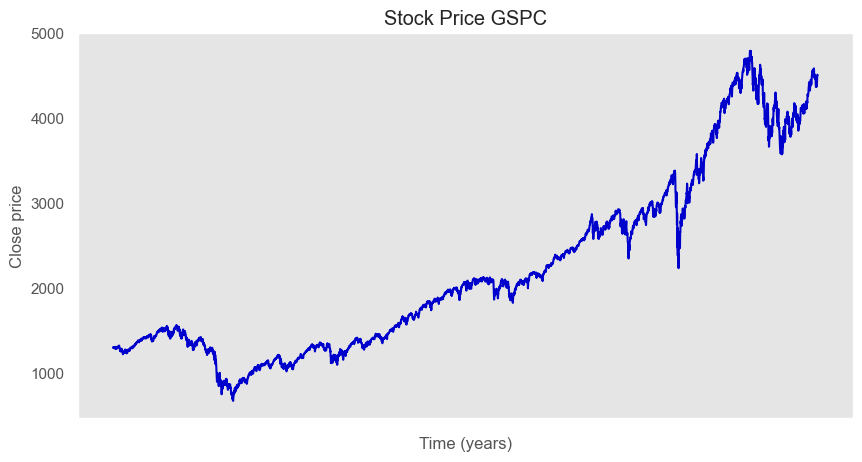

In [16]:
close = df['Close']

fig = plt.figure(figsize=(10,5))
fig.set(facecolor = "white")
plt.plot(close, 'mediumblue',label=['S&P 500 Close Price'])
plt.gca().set_xticklabels([])
plt.grid(False)

plt.title('Stock Price GSPC')
plt.xlabel('Time (years)')
plt.ylabel('Close price')
plt.show()

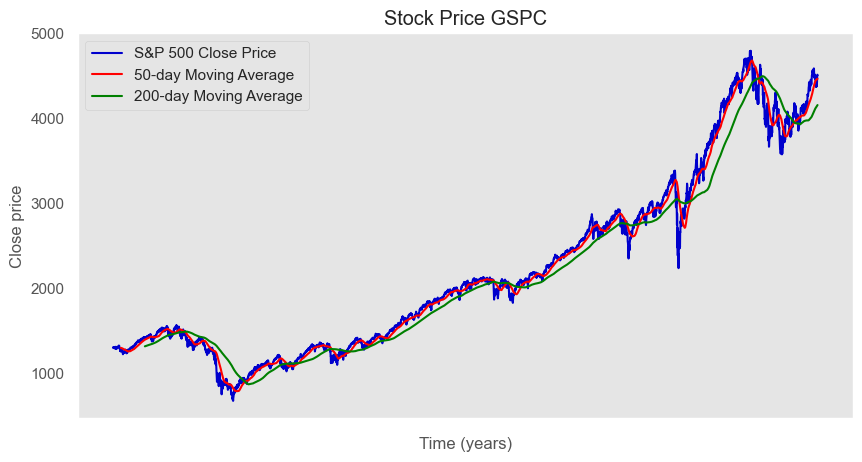

In [17]:
df['MA_50'] = df['Close'].rolling(50).mean()
df['MA_200'] = df['Close'].rolling(200).mean()

fig = plt.figure(figsize=(10,5))
fig.set(facecolor = "white")
plt.plot(df['Close'], 'mediumblue',label=['S&P 500 Close Price'])
plt.plot(df['MA_50'],'red', label=['50-day MA'])
plt.plot(df['MA_200'],'green', label=['200-day MA'])
plt.legend(['S&P 500 Close Price', '50-day Moving Average', '200-day Moving Average'], loc='upper left')

plt.gca().set_xticklabels([])
plt.grid(False)

plt.title('Stock Price GSPC')
plt.xlabel('Time (years)')
plt.ylabel('Close price')
plt.show()

## Correlation Heatmap

In [18]:
data.head()

,Open,High,Low,Close,SAR,MACD,RSI,ATR,MFI,USDX,VIX,EFFR,UNRATE,UMSCENT
Date,,,,,,,,,,,,,,
2006-03-15,1297.479980,1304.400024,1294.969971,1303.020020,1245.73999,4.059285,63.124058,10.392993,56.832217,89.699997,11.35,4.47,4.7,88.9
2006-03-16,1303.020020,1310.449951,1303.020020,1305.329956,1245.73999,4.826013,66.985742,10.051992,56.670295,89.070000,11.98,4.55,4.7,88.9
2006-03-17,1305.329956,1309.790039,1305.319946,1307.250000,1245.73999,5.571365,81.354102,9.988794,60.493283,88.919998,12.12,4.60,4.7,88.9
2006-03-20,1307.250000,1310.000000,1303.589966,1305.079956,1245.73999,6.122679,81.725270,9.984795,60.708410,89.129997,11.79,4.55,4.7,88.9
2006-03-21,1305.079956,1310.880005,1295.819946,1297.229980,1245.73999,6.260491,68.291731,10.033796,60.639310,89.620003,11.62,4.54,4.7,88.9


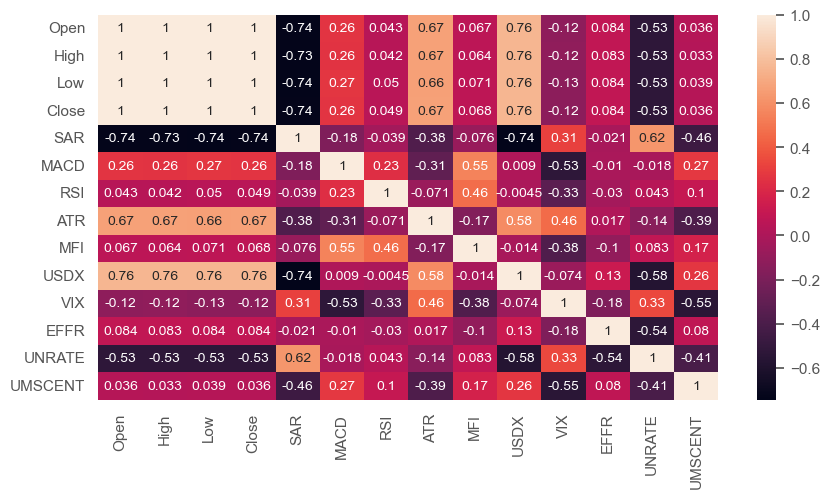

In [19]:
fig = plt.figure(figsize= (10,5))
sns.heatmap(data.corr(), annot=True)
sns.set_style("whitegrid")
plt.show()

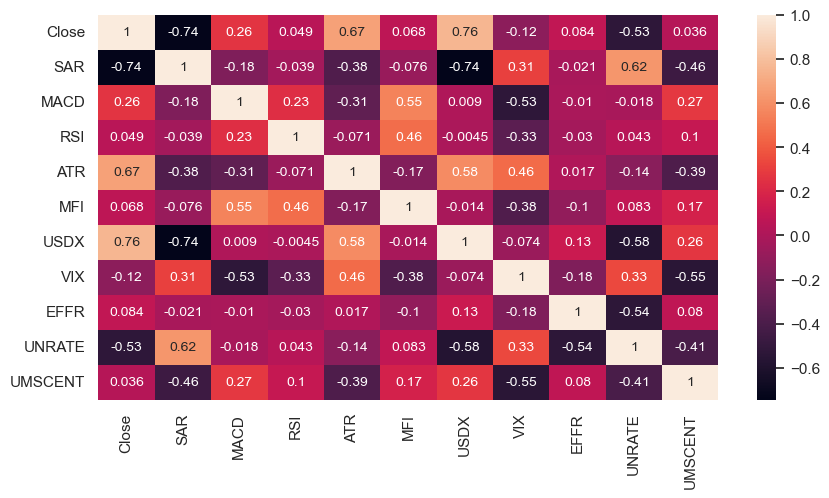

In [20]:
data = data.iloc[:, 3:]
fig = plt.figure(figsize= (10,5))
sns.heatmap(data.corr(), annot=True)
sns.set_style("whitegrid")
plt.show()

<Figure size 2000x1200 with 0 Axes>

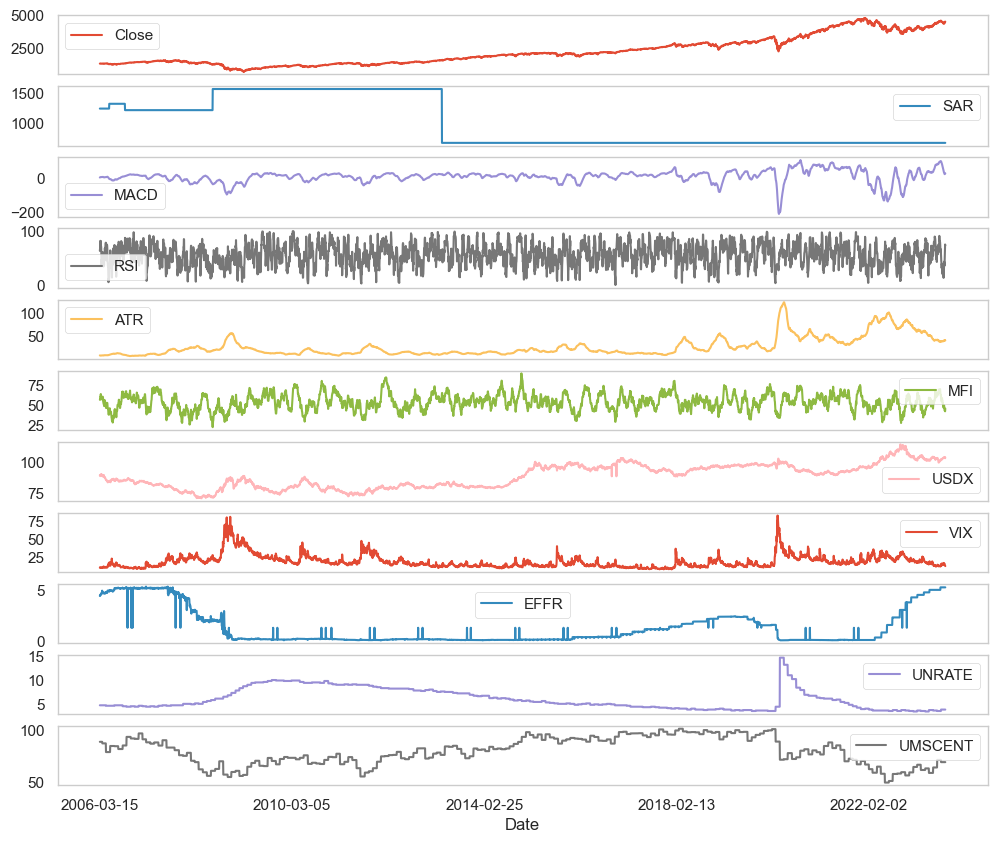

In [21]:
fig = plt.figure(figsize = (20, 12))
data.plot(subplots = True, figsize = (12,10),grid=False)
sns.set_style("whitegrid")
plt.show()

In [22]:
data.describe()

,Close,SAR,MACD,RSI,ATR,MFI,USDX,VIX,EFFR,UNRATE,UMSCENT
count,4397.000000,4397.000000,4397.000000,4397.000000,4397.000000,4397.000000,4397.000000,4397.000000,4397.000000,4397.000000,4397.000000
mean,2215.995963,989.352357,9.961819,55.994301,28.674883,53.891476,88.777090,19.870871,1.299982,6.016352,80.222766
std,1060.725848,404.539485,36.226028,19.770110,20.503058,10.139617,9.272771,9.110330,1.721908,2.205442,13.047978
min,676.530029,666.789978,-212.441916,0.000000,8.880007,22.365246,71.330002,9.140000,0.040000,3.400000,50.000000
25%,1340.199951,666.789978,-2.658452,42.061798,14.784806,46.742932,80.480003,13.740000,0.100000,4.300000,70.600000
50%,1978.089966,666.789978,14.138794,56.496934,20.522988,53.825806,89.129997,17.500000,0.200000,5.100000,80.900000
75%,2853.580078,1576.089966,25.995324,70.086803,35.086426,61.071333,96.570000,23.110001,1.990000,7.800000,91.900000
max,4796.560059,1576.089966,107.397605,99.566735,123.041602,89.979368,114.110001,82.690002,5.410000,14.700000,101.400000


## Data Denoising

In [23]:
data.head()

,Close,SAR,MACD,RSI,ATR,MFI,USDX,VIX,EFFR,UNRATE,UMSCENT
Date,,,,,,,,,,,
2006-03-15,1303.020020,1245.73999,4.059285,63.124058,10.392993,56.832217,89.699997,11.35,4.47,4.7,88.9
2006-03-16,1305.329956,1245.73999,4.826013,66.985742,10.051992,56.670295,89.070000,11.98,4.55,4.7,88.9
2006-03-17,1307.250000,1245.73999,5.571365,81.354102,9.988794,60.493283,88.919998,12.12,4.60,4.7,88.9
2006-03-20,1305.079956,1245.73999,6.122679,81.725270,9.984795,60.708410,89.129997,11.79,4.55,4.7,88.9
2006-03-21,1297.229980,1245.73999,6.260491,68.291731,10.033796,60.639310,89.620003,11.62,4.54,4.7,88.9


In [24]:
from skimage.restoration import (denoise_wavelet, estimate_sigma)

data['Close']= denoise_wavelet(data.iloc[:, 0], wavelet='haar',
                                      method='VisuShrink',
                                      mode='soft', rescale_sigma = True)
data.head()

,Close,SAR,MACD,RSI,ATR,MFI,USDX,VIX,EFFR,UNRATE,UMSCENT
Date,,,,,,,,,,,
2006-03-15,1297.479562,1245.73999,4.059285,63.124058,10.392993,56.832217,89.699997,11.35,4.47,4.7,88.9
2006-03-16,1297.479562,1245.73999,4.826013,66.985742,10.051992,56.670295,89.070000,11.98,4.55,4.7,88.9
2006-03-17,1297.479562,1245.73999,5.571365,81.354102,9.988794,60.493283,88.919998,12.12,4.60,4.7,88.9
2006-03-20,1297.479562,1245.73999,6.122679,81.725270,9.984795,60.708410,89.129997,11.79,4.55,4.7,88.9
2006-03-21,1297.479562,1245.73999,6.260491,68.291731,10.033796,60.639310,89.620003,11.62,4.54,4.7,88.9


In [25]:
data.describe()

,Close,SAR,MACD,RSI,ATR,MFI,USDX,VIX,EFFR,UNRATE,UMSCENT
count,4397.000000,4397.000000,4397.000000,4397.000000,4397.000000,4397.000000,4397.000000,4397.000000,4397.000000,4397.000000,4397.000000
mean,2216.078954,989.352357,9.961819,55.994301,28.674883,53.891476,88.777090,19.870871,1.299982,6.016352,80.222766
std,1059.511080,404.539485,36.226028,19.770110,20.503058,10.139617,9.272771,9.110330,1.721908,2.205442,13.047978
min,728.323895,666.789978,-212.441916,0.000000,8.880007,22.365246,71.330002,9.140000,0.040000,3.400000,50.000000
25%,1346.052412,666.789978,-2.658452,42.061798,14.784806,46.742932,80.480003,13.740000,0.100000,4.300000,70.600000
50%,1971.031453,666.789978,14.138794,56.496934,20.522988,53.825806,89.129997,17.500000,0.200000,5.100000,80.900000
75%,2842.568211,1576.089966,25.995324,70.086803,35.086426,61.071333,96.570000,23.110001,1.990000,7.800000,91.900000
max,4748.140636,1576.089966,107.397605,99.566735,123.041602,89.979368,114.110001,82.690002,5.410000,14.700000,101.400000


## Evaluation Metrics

In [26]:
def mean_absolute_percentage_error(y_true, y_pred):
    return (np.mean(np.abs((y_true - y_pred)/(y_true))*100))

def calculate_scores(y_true, y_pred):
  mae = mean_absolute_error(y_true, y_pred)
  mape = mean_absolute_percentage_error(y_true, y_pred)
  mse = mean_squared_error(y_true, y_pred)
  rmse = np.sqrt(mse)
  R = np.corrcoef(y_true, y_pred)
  r2 = r2_score(y_true, y_pred)

  print(f"Mean Absolute Error (MAE): {mae:.4f}")
  print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}")
  print(f"Mean Squared Error (MSE): {mse:.4f}")
  print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
  print(f"R-Pearson Correlation Coefficient (R): {R[0,1]:.4f}")
  print(f"R-squared (R2): {r2:.4f}")
  dic = {'rmse':rmse, 'R': R[0,1], 'mape': mape}
  return (dic)

## Supporting Function

In [27]:
def DatasetCreation(dataset, time_step = 1): 
   DataX, DataY = [], []
   for i in range(len(dataset)- time_step -1):
         a = dataset[i:(i+ time_step), ]
         DataX.append(a)
         DataY.append(dataset[i + time_step, 0]) 
   return np.array(DataX), np.array(DataY)


def data_split(data, split = 0.2):
  l1   = int(len(data) * (1- split))
  l2    = len(data) - l1
  data1  = data.iloc[0:l1,:]
  data2   = data.iloc[l1:len(data),:]
  return data1, data2

def min_max_transform(data, feature_range=(0, 1)):
   scaler = MinMaxScaler(feature_range)
   return scaler.fit_transform(data)

def min_max_inverse_transform(data_scaled, min_original, max_original):
    return min_original +  data_scaled*(max_original - min_original)

## Visualization

In [28]:
def true_pred_plot(model_output):

  y_train = model_output['datasets']['y_train']
  y_test =  model_output['datasets']['y_test']

  train_pred = model_output['best_model']['train_predictions']
  test_pred = model_output['best_model']['test_predictions']

  fig = plt.figure(figsize= (14,5))
  plt.subplot(121)
  plt.scatter(y_train, train_pred, marker= "+", color = 'mediumblue')
  identity_line = np.linspace(max(min(y_train), min(train_pred)), min(max(y_train), max(train_pred)))
  plt.plot(identity_line, identity_line, color="red", linestyle="dashed", linewidth= 2.5)
  plt.xlabel("True")
  plt.ylabel("Predicted")
  plt.title("Training data (a)")

  plt.subplot(122)
  plt.scatter(y_test, test_pred, marker = "+", color = 'mediumblue')
  identity_line = np.linspace(max(min(y_test), min(test_pred)), min(max(y_test), max(test_pred)))
  plt.plot(identity_line, identity_line, color="red", linestyle="dashed", linewidth= 2.5)
  plt.xlabel("True")
  plt.ylabel("Predicted")
  plt.title("Test data (b)")

  plt.suptitle("Scatter plot of True vs Predicted Close prices")
  plt.show()


def best_model_prediction_plot(model_output):

  time_step =  model_output['hyper_parameters']['time_step']

  data = model_output['datasets']['data']

  train_predict_plot_data = np.empty_like(data.values[:,0])
  train_predict_plot_data[:] = np.nan

  test_predict_plot_data = np.empty_like(data.values[:,0])
  test_predict_plot_data[:] = np.nan

  fig = plt.figure(figsize = (14,5))

  plt.subplot(121)

  train_pred = model_output['best_model']['train_predictions']
  test_pred = model_output['best_model']['test_predictions']

  train_predict_plot_data[time_step:len(train_pred)+ time_step] =  train_pred
  test_predict_plot_data[len(train_pred)+(time_step*2)+1:len(data.values)-1] = test_pred

  plt.plot(data.values[:,0],'k', linewidth = 1.5)
  plt.plot(train_predict_plot_data,'mediumblue',linewidth = 1.5)
  plt.plot(test_predict_plot_data,'darkgreen',linewidth = 1.5)
  plt.xlabel('')
  plt.ylabel('Close price')
  plt.title("(a)")
  plt.legend(['True value', 'Predicted value in train set', 'Predicted value in test set'], loc = 'upper left')

  plt.subplot(122)
  plt.plot(data.values[len(train_pred)+(time_step*2)+1:-1, 0],'k',linewidth = 1.5)
  plt.plot(test_pred,'darkgreen',linewidth = 1.5)
  plt.xlabel('')
  plt.ylabel('Close price')
  plt.title("(b)")
  plt.legend(['True value', 'Predicted value'], loc='upper left')


In [29]:
def create_visualization(model_output):
  true_pred_plot(model_output)
  best_model_prediction_plot(model_output)

## Single Layer LSTM

In [30]:
from keras.optimizers import Adam,Adagrad,Nadam

def build_single_layer_LSTM(layers, time_step, num_features, optimizer = 0, learning_rate = 0.001, verbose = 1):
  model = Sequential()

  model.add(LSTM(int(layers[0]), input_shape = (time_step, num_features)))
  model.add(Dense(1, activation = 'linear'))

  optimizer = int(optimizer)

  if optimizer == 0:
    opt = Adam(learning_rate = learning_rate)
  elif optimizer == 1:
    opt = Adagrad(learning_rate = learning_rate)
  elif optimizer == 2:
    opt = Nadam(learning_rate = learning_rate)
  else:
    print("No optimizer found in the list(['Adam', 'Adagrad','Nadam'])!")

  model.compile(loss='mean_squared_error', optimizer= opt)

  if verbose == 1:
    print(model.summary())
  return model

In [31]:
optimizers_names = [0,1,2]

build_single_layer_LSTM([250], 5, 10, optimizers_names[2], 0.001, 1)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 250)               261000    
                                                                 
 dense (Dense)               (None, 1)                 251       
                                                                 
Total params: 261251 (1020.51 KB)
Trainable params: 261251 (1020.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [16]:
def single_layer_LSTM(neurons, hyper_parameters, data, time_step = 5, test_split = 0.2, epochs = 20,  num_replicates = 2):

  print("Progress: Performing data preparation steps.......\n")

  train_data, test_data = data_split(data, test_split)
  num_features = train_data.shape[1]

  min_train, max_train  = train_data["Close"].min(), train_data["Close"].max()
  min_test, max_test   =  test_data["Close"].min(), test_data["Close"].max()

  train_data_scaled  =  min_max_transform(train_data)
  test_data_scaled   = min_max_transform(test_data)

  X_train, y_train  =   DatasetCreation(train_data_scaled, time_step)
  X_test, y_test    =   DatasetCreation(test_data_scaled, time_step)

  y_train_original  =  min_max_inverse_transform(y_train, min_train, max_train)
  y_test_original  =  min_max_inverse_transform(y_test, min_test, max_test)

  print("Progress: Building and training models.......\n")

  neurons = np.array(neurons)
  rmse_array = np.zeros((len(neurons), num_replicates))
  #mae_array  = np.zeros((len(neurons), num_replicates))
  mape_array = np.zeros((len(neurons), num_replicates))
  #R2_array   = np.zeros((len(neurons), num_replicates))
  R_array    = np.zeros((len(neurons), num_replicates))
  elapsed_time_array = np.zeros((len(neurons), num_replicates))

  models_history = []

  train_predictions = []
  test_predictions  = []

  for i in range(len(neurons)):

    print("Model hyperparameters used: \n ", hyper_parameters[i])
    model_history_per_replicate = []
    train_predictions_per_replicate = []
    test_predictions_per_replicate  = []

    hidden_nodes = int(neurons[i])

    for k in range(num_replicates):

      print("Program is running for %d neurons and %d replicate ----->\n" %(hidden_nodes, k))

      layers = [hidden_nodes]

      model = build_single_layer_LSTM(layers, time_step, num_features, optimizer = hyper_parameters[i][0], learning_rate = hyper_parameters[i][1], verbose = 0)
      callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience= 5)

      start = time.time()
      history = model.fit(X_train, y_train, batch_size = hyper_parameters[i][2], epochs= epochs, callbacks=[callback], verbose = 1)

      end = time.time()
      elapsed_time = end - start

      model_history_per_replicate.append(history)

      train_pred   =  min_max_inverse_transform(model.predict(X_train).ravel(), min_train, max_train)
      test_pred    =  min_max_inverse_transform(model.predict(X_test).ravel(), min_test, max_test)

      train_predictions_per_replicate.append(train_pred)
      test_predictions_per_replicate.append(test_pred)

      scores =   calculate_scores(min_max_inverse_transform(y_test, min_test, max_test),test_pred)

      rmse_array[i][k] = scores['rmse']
      mape_array[i][k] =  scores['mape']
      R_array[i][k] = scores['R']
      elapsed_time_array[i][k] = elapsed_time

    models_history.append(model_history_per_replicate)
    train_predictions.append(train_predictions_per_replicate)
    test_predictions.append(test_predictions_per_replicate)

  print("Progress: Collecting outputs.......\n")


  neurons_df = pd.DataFrame(neurons)
  rmse_df = pd.DataFrame(rmse_array)
  mape_df  = pd.DataFrame(mape_array)
  R_df    = pd.DataFrame(R_array)
  elapsed_time_df =  pd.DataFrame(elapsed_time_array)

  train_predictions  = np.array(train_predictions)
  test_predictions   = np.array(test_predictions)
  min_index = pd.DataFrame(rmse_df.min(axis = 1)).idxmin()[0]
  min_col =   pd.DataFrame(rmse_df.min(axis = 0)).idxmin()[0]

  num_neurons_with_best_rmse = neurons_df.loc[min_index,0]

  best_rmse = rmse_df.loc[min_index, min_col]
  mape_with_best_rmse = mape_df.loc[min_index, min_col]
  R_with_best_rmse =  R_df.loc[min_index, min_col]
  elapsed_time_with_best_rmse = elapsed_time_df.loc[min_index, min_col]

  train_predictions_with_best_rmse = train_predictions[min_index][min_col]
  test_predictions_with_best_rmse = test_predictions[min_index][min_col]

  loss_with_best_rmse = models_history[min_index][min_col].history['loss']

  hyper_parameters = { 'neurons': neurons,
                       'model_specific_hyper_parameters': hyper_parameters,#additional best_hyper_parmeters for each models
                       'epochs': epochs,
                       'time_step':time_step,
                       'num_replicates': num_replicates,
                       'test_split':test_split
                        }
  scores = {'neurons': neurons_df, 'rmse': rmse_df, 'mape': mape_df, 'R': R_df, 'elapsed_time': elapsed_time_df}

  avg_scores = pd.DataFrame({'neurons': neurons,
                            'rmse': rmse_df.mean(axis = 1),
                            'mape': mape_df.mean(axis = 1),
                            'R': R_df.mean(axis = 1),
                            'elapsed_time': elapsed_time_df.mean(axis = 1)})
  all_stds = pd.DataFrame({'neurons': neurons,
                            'rmse': rmse_df.std(axis = 1),
                            'mape': mape_df.std(axis = 1),
                            'R': R_df.std(axis = 1),
                            'elapsed_time': elapsed_time_df.std(axis = 1)})
  all_minimums = pd.DataFrame({'neurons': neurons,
                            'rmse': rmse_df.min(axis = 1),
                            'mape': mape_df.min(axis = 1),
                            'R': R_df.min(axis = 1),
                            'elapsed_time': elapsed_time_df.min(axis = 1)})
  all_maximums = pd.DataFrame({'neurons': neurons,
                            'rmse': rmse_df.max(axis = 1),
                            'mape': mape_df.max(axis = 1),
                            'R': R_df.max(axis = 1),
                            'elapsed_time': elapsed_time_df.max(axis = 1)})
  model_with_best_rmse = {  'neurons': num_neurons_with_best_rmse,
                            'replicate': min_col,
                            'rmse': best_rmse,
                            'mape': mape_with_best_rmse,
                            'R':  R_with_best_rmse,
                            'elapsed_time': elapsed_time_with_best_rmse,
                            'train_predictions':train_predictions_with_best_rmse,
                            'test_predictions': test_predictions_with_best_rmse,
                            'loss':loss_with_best_rmse,

                         }

  datasets  =    {'data': data,
                  'X_train': X_train,
                  'X_test': X_test,
                  'y_train': y_train_original,
                  'y_test': y_test_original
                  }

  print("\nBest model (neurons, replicate, rmse): ", num_neurons_with_best_rmse, min_col, best_rmse)
  print('\nAverage scores:\n', avg_scores)
  print('\nStandard_deviations:\n', all_stds)
  print('\nMinimums:\n', all_minimums)
  print('\nMaximums:\n', all_maximums)

  output_dictionary = { 'hyper_parameters': hyper_parameters,
                        'best_model': model_with_best_rmse,
                        'scores': scores,
                        'avg_scores': avg_scores,
                        'all_stds': all_stds,
                        'all_minimums': all_minimums,
                        'all_maximums': all_maximums,
                        'train_predictions': train_predictions,
                        'test_predictions':  test_predictions,
                        'models_history': models_history,
                        'datasets': datasets
                       }

  return (output_dictionary)

## ARO

In [32]:
from keras.optimizers import Adam,Adagrad
import mealpy
mealpy.__version__
from mealpy import FloatVar, ARO, StringVar, IntegerVar


In [14]:
train_data ,test_data  = data_split(data, 0.2)
print("Total train data : ")
print(len(train_data))
print("No of data used for hyper-parametr tuning")
train_data ,val_data  = data_split(train_data, 0.2)
print("training data : ")
print(len(train_data))
print("validation data : ")
print(len(val_data))

Total train data : 
3517
No of data used for hyper-parametr tuning
training data : 
2813
validation data : 
704


In [15]:
min_train, max_train = train_data["Close"].min(), train_data["Close"].max()
min_test, max_test = val_data["Close"].min(), val_data["Close"].max()
train_data_scaled = min_max_transform(train_data)
test_data_scaled = min_max_transform(val_data)
X_train, y_train = DatasetCreation(train_data_scaled, 5)
X_test, y_test = DatasetCreation(test_data_scaled, 5)
num_features = train_data.shape[1]
y_train_original = min_max_inverse_transform(y_train, min_train, max_train)
y_test_original = min_max_inverse_transform(y_test, min_test, max_test)

# ARO Epoch - 15, Population - 25

In [64]:
def objective_function(solution):
    neurons = int(solution[0])  
    optimizer = solution[1]
    learning_rate = solution[2]
    batch_size = int(solution[3])

    print("============================================= Running For =============================================")

    print("Values used are : (neurons, optimizer, learning rate, batch size)")
    print(neurons)
    print(optimizer)
    print(learning_rate)
    print(batch_size)

    lstm_model = build_single_layer_LSTM(layers=[neurons], time_step= 5, num_features=num_features, optimizer=optimizer, learning_rate=learning_rate,verbose=0)
    callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience= 5)
    lstm_model.fit(X_train, y_train, epochs=50, batch_size=batch_size, callbacks=[callback],verbose=0)

    ypred = min_max_inverse_transform(lstm_model.predict(X_test).ravel(), min_test, max_test)
    ytest = min_max_inverse_transform(y_test, min_test, max_test)

    mse =  np.mean((ytest - ypred)**2)
    rmse = np.sqrt(mse)

    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print("=============================================================================================")
    return rmse

# Define the bounds for neurons and dropout rate
neurons_bounds = (10,200) 
optimizers = ('Adam','Adagrad','Nadam')
learning_rates = (0.001,0.1)
batches = (8,32)

bound = (FloatVar(lb=neurons_bounds[0], ub=neurons_bounds[1], name="neurons"),
         StringVar(valid_sets=optimizers, name="optimizer"),
         FloatVar(lb=learning_rates[0], ub=learning_rates[1], name="learning_rate"),
         FloatVar(lb=batches[0], ub=batches[1], name="batch_size"))

problem_dict = {
    "bounds": bound,
    "obj_func": objective_function,
    "minmax": "min",
}

model = ARO.IARO(epoch=15, pop_size=25)
best_hyperparameters = model.solve(problem_dict)
print("Optimizers : 0 for Adam, 1 for Adagrad, 2 for Nadam")
print("Best Hyperparameters (Neurons, Optimizer, Learning Rate, Batch):", best_hyperparameters.solution)


============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
142
2.0
0.05403689100664387
14
22/22 [==============================] - 1s 4ms/step


2023/12/30 07:05:05 PM, INFO, mealpy.swarm_based.ARO.IARO: Solving single objective optimization problem.


Root Mean Squared Error (RMSE): 253.5249
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
36
1.0
0.007388256129342279
21
22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 71.7842
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
135
0.0
0.05640383815074323
10
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 45.3218
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
107
1.0
0.03623992978563459
28
22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 24.7796
============================================= Running For ===================

22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 88.3146
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
29
1.0
0.029448059747362754
28
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 26.4743
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
14
0.0
0.08396294435361376
29
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 45.5242
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
99
2.0
0.04578762832085864
25
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 26.0964
===========================

22/22 [==============================] - 1s 5ms/step
Root Mean Squared Error (RMSE): 38.5032
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
94
2.0
0.09419398207963932
19
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 28.5874
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
128
0.0
0.1
32
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 26.4217
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
78
0.0
0.07491230533327221
8
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 20.9174
============================================

2023/12/30 07:26:56 PM, INFO, mealpy.swarm_based.ARO.IARO: >>>Problem: P, Epoch: 1, Current best: 17.534608790287198, Global best: 17.534608790287198, Runtime: 653.67143 seconds


Root Mean Squared Error (RMSE): 22.9647
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
88
1.0
0.03789326486859922
20
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 24.0851
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
10
0.0
0.001
8
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 25.9099
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
87
0.0
0.001
10
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 27.5196
============================================= Running For =============================================
Values

22/22 [==============================] - 1s 5ms/step
Root Mean Squared Error (RMSE): 26.3527
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
25
0.0
0.04596332898076826
28
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 21.1615
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
10
0.0
0.06013695001145244
17
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 38.0465
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
118
0.0
0.1
32
22/22 [==============================] - 1s 5ms/step


2023/12/30 07:41:04 PM, INFO, mealpy.swarm_based.ARO.IARO: >>>Problem: P, Epoch: 2, Current best: 17.534608790287198, Global best: 17.534608790287198, Runtime: 847.75137 seconds


Root Mean Squared Error (RMSE): 125.9351
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
88
1.0
0.03789326486859922
20
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 23.9927
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
176
2.0
0.029868079226148654
18
22/22 [==============================] - 1s 5ms/step
Root Mean Squared Error (RMSE): 22.6006
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
66
1.0
0.03979615824544506
10
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 24.6854
============================================= Running For ====================

22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 29.1793
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
11
0.0
0.020978753851645774
13
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 25.7868
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
77
0.0
0.024756406119249418
31
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 22.0422
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
100
2.0
0.01617412353899779
29
22/22 [==============================] - 1s 5ms/step


2023/12/30 07:53:47 PM, INFO, mealpy.swarm_based.ARO.IARO: >>>Problem: P, Epoch: 3, Current best: 17.534608790287198, Global best: 17.534608790287198, Runtime: 762.51392 seconds


Root Mean Squared Error (RMSE): 26.9042
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
141
1.0
0.06057457967399733
20
22/22 [==============================] - 1s 5ms/step
Root Mean Squared Error (RMSE): 23.3364
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
200
2.0
0.04406031534717252
24
22/22 [==============================] - 1s 5ms/step
Root Mean Squared Error (RMSE): 185.1617
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
104
0.0
0.03532039403866346
28
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 35.3060
============================================= Running For ===================

22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 20.3919
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
180
1.0
0.04445339787726515
29
22/22 [==============================] - 1s 5ms/step
Root Mean Squared Error (RMSE): 23.1636
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
10
0.0
0.04596332898076826
26
22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 33.9511
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
10
0.0
0.0033808412959681206
8
22/22 [==============================] - 1s 4ms/step


2023/12/30 08:07:18 PM, INFO, mealpy.swarm_based.ARO.IARO: >>>Problem: P, Epoch: 4, Current best: 17.534608790287198, Global best: 17.534608790287198, Runtime: 811.22491 seconds


Root Mean Squared Error (RMSE): 19.4317
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
12
0.0
0.04240729811028982
15
22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 24.0116
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
10
0.0
0.022774889067519403
8
22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 31.6907
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
72
0.0
0.03949616757933426
32
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 31.3174
============================================= Running For =======================

22/22 [==============================] - 1s 6ms/step
Root Mean Squared Error (RMSE): 50.2183
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
10
0.0
0.029276414138072734
27
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 21.9543
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
77
0.0
0.0235853041906115
31
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 21.5650
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
47
0.0
0.001
8
22/22 [==============================] - 1s 4ms/step


2023/12/30 08:19:54 PM, INFO, mealpy.swarm_based.ARO.IARO: >>>Problem: P, Epoch: 5, Current best: 17.534608790287198, Global best: 17.534608790287198, Runtime: 755.94535 seconds


Root Mean Squared Error (RMSE): 24.1804
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
200
1.0
0.06821832305898372
28
22/22 [==============================] - 1s 5ms/step
Root Mean Squared Error (RMSE): 25.2399
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
176
2.0
0.029868079226148654
18
22/22 [==============================] - 1s 5ms/step
Root Mean Squared Error (RMSE): 26.1079
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
108
0.0
0.03618207926798568
28
22/22 [==============================] - 1s 5ms/step
Root Mean Squared Error (RMSE): 29.6003
============================================= Running For ===================

22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 27.5488
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
107
1.0
0.023826014189822397
32
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 26.8629
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
47
0.0
0.022774889067519403
8
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 27.3384
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
12
0.0
0.0119621108339341
8
22/22 [==============================] - 1s 2ms/step


2023/12/30 08:32:59 PM, INFO, mealpy.swarm_based.ARO.IARO: >>>Problem: P, Epoch: 6, Current best: 17.534608790287198, Global best: 17.534608790287198, Runtime: 785.02632 seconds


Root Mean Squared Error (RMSE): 21.1271
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
10
0.0
0.0033808412959681206
16
22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 20.8542
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
110
0.0
0.05502883621325176
28
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 37.2714
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
46
0.0
0.012986812323060815
28
22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 24.7404
============================================= Running For ===================

22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 20.6001
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
31
0.0
0.0425293298830889
27
22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 20.0458
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
90
0.0
0.02567816632333087
32
22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 29.1611
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
10
0.0
0.0033808412959681206
28
22/22 [==============================] - 1s 3ms/step


2023/12/30 08:45:16 PM, INFO, mealpy.swarm_based.ARO.IARO: >>>Problem: P, Epoch: 7, Current best: 17.534608790287198, Global best: 17.534608790287198, Runtime: 736.69429 seconds


Root Mean Squared Error (RMSE): 29.5583
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
200
1.0
0.04479138285702636
32
22/22 [==============================] - 1s 6ms/step
Root Mean Squared Error (RMSE): 24.5161
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
11
0.0
0.1
32
22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 20.5115
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
10
0.0
0.001
14
22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 26.5572
============================================= Running For =============================================
Values

22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 26.0910
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
10
0.0
0.001
8
22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 41.3349
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
77
0.0
0.0235853041906115
31
22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 32.4033
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
10
0.0
0.001
8
22/22 [==============================] - 1s 3ms/step


2023/12/30 09:02:18 PM, INFO, mealpy.swarm_based.ARO.IARO: >>>Problem: P, Epoch: 8, Current best: 17.534608790287198, Global best: 17.534608790287198, Runtime: 1022.89875 seconds


Root Mean Squared Error (RMSE): 28.1964
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
38
1.0
0.001
17
22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 114.0386
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
13
0.0
0.1
32
22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 18.1812
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
200
2.0
0.07220291659841355
32
22/22 [==============================] - 1s 6ms/step
Root Mean Squared Error (RMSE): 124.8683
============================================= Running For =============================================
Valu

22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 21.7530
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
31
0.0
0.0310048783731963
27
22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 22.4208
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
200
2.0
0.001
8
22/22 [==============================] - 1s 6ms/step
Root Mean Squared Error (RMSE): 19.0535
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
39
0.0
0.05536021643258112
17
22/22 [==============================] - 1s 3ms/step


2023/12/30 09:15:57 PM, INFO, mealpy.swarm_based.ARO.IARO: >>>Problem: P, Epoch: 9, Current best: 17.534608790287198, Global best: 17.534608790287198, Runtime: 818.63004 seconds


Root Mean Squared Error (RMSE): 25.8524
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
10
0.0
0.0033431630677332315
16
22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 40.6557
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
11
0.0
0.08655927368899492
27
22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 30.0878
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
107
1.0
0.03966010516881825
32
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 24.6231
============================================= Running For ====================

22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 17.9070
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
38
2.0
0.001
8
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 22.4090
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
74
2.0
0.001
8
22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 19.1306
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
10
0.0
0.001
8
22/22 [==============================] - 1s 3ms/step


2023/12/30 09:36:13 PM, INFO, mealpy.swarm_based.ARO.IARO: >>>Problem: P, Epoch: 10, Current best: 17.534608790287198, Global best: 17.534608790287198, Runtime: 1215.67323 seconds


Root Mean Squared Error (RMSE): 23.5708
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
10
0.0
0.0035568995120579157
16
22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 27.9618
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
10
0.0
0.1
16
22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 24.4679
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
100
1.0
0.03623992978563459
27
22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 24.3004
============================================= Running For ====================================

22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 21.1640
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
26
0.0
0.0741826366205044
27
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 25.5944
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
31
0.0
0.0425293298830889
8
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 21.7328
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
10
0.0
0.00453668745199148
8
22/22 [==============================] - 1s 4ms/step


2023/12/30 09:50:03 PM, INFO, mealpy.swarm_based.ARO.IARO: >>>Problem: P, Epoch: 11, Current best: 17.534608790287198, Global best: 17.534608790287198, Runtime: 830.15981 seconds


Root Mean Squared Error (RMSE): 17.6893
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
10
0.0
0.002789416671885948
13
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 37.5756
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
10
0.0
0.06429544725571269
20
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 28.8118
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
101
0.0
0.03422176604403065
20
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 25.2394
============================================= Running For =====================

22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 19.8430
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
31
0.0
0.001
20
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 29.1558
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
200
2.0
0.0017056818274634282
8
22/22 [==============================] - 1s 6ms/step
Root Mean Squared Error (RMSE): 19.3259
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
12
0.0
0.005580458100022148
8
22/22 [==============================] - 1s 4ms/step


2023/12/30 10:03:19 PM, INFO, mealpy.swarm_based.ARO.IARO: >>>Problem: P, Epoch: 12, Current best: 17.11133200703943, Global best: 17.11133200703943, Runtime: 795.95304 seconds


Root Mean Squared Error (RMSE): 21.9121
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
10
0.0
0.0024037745015655356
15
22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 35.6793
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
18
0.0
0.1
32
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 22.7484
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
97
0.0
0.03113158009653561
24
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 50.6193
============================================= Running For =====================================

22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 20.7014
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
39
0.0
0.05293688409445977
27
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 25.0686
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
200
2.0
0.001
8
22/22 [==============================] - 1s 6ms/step
Root Mean Squared Error (RMSE): 27.0046
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
11
0.0
0.00453668745199148
8
22/22 [==============================] - 1s 3ms/step


2023/12/30 10:15:44 PM, INFO, mealpy.swarm_based.ARO.IARO: >>>Problem: P, Epoch: 13, Current best: 17.11133200703943, Global best: 17.11133200703943, Runtime: 745.66511 seconds


Root Mean Squared Error (RMSE): 21.0840
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
10
0.0
0.0036289545992140952
17
22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 35.7121
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
15
0.0
0.1
32
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 32.9829
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
107
0.0
0.03623992978563459
28
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 34.1443
============================================= Running For ====================================

22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 26.4249
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
31
0.0
0.040910319786171156
27
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 28.8460
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
200
2.0
0.001
8
22/22 [==============================] - 1s 5ms/step
Root Mean Squared Error (RMSE): 19.4480
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
10
0.0
0.004766041367166428
8
22/22 [==============================] - 1s 3ms/step


2023/12/30 10:30:51 PM, INFO, mealpy.swarm_based.ARO.IARO: >>>Problem: P, Epoch: 14, Current best: 17.11133200703943, Global best: 17.11133200703943, Runtime: 906.26810 seconds


Root Mean Squared Error (RMSE): 29.0436
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
10
0.0
0.0033808412959681206
16
22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 20.6064
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
13
0.0
0.1
32
22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 23.3093
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
107
1.0
0.03623992978563459
28
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 24.7154
============================================= Running For ====================================

22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 21.0715
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
31
0.0
0.0425293298830889
27
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 23.4015
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
200
2.0
0.001
8
22/22 [==============================] - 1s 5ms/step
Root Mean Squared Error (RMSE): 17.9255
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
10
0.0
0.00453668745199148
8
22/22 [==============================] - 1s 4ms/step


2023/12/30 10:45:05 PM, INFO, mealpy.swarm_based.ARO.IARO: >>>Problem: P, Epoch: 15, Current best: 17.11133200703943, Global best: 17.11133200703943, Runtime: 854.71830 seconds


Root Mean Squared Error (RMSE): 24.1223
Optimizers : 0 for Adam, 1 for Adagrad, 2 for Nadam
Best Hyperparameters (Neurons, Optimizer, Learning Rate, Batch): [1.0000000e+01 0.0000000e+00 4.9402527e-03 8.0000000e+00]


In [65]:
print(best_hyperparameters.solution)

neurons = int(best_hyperparameters.solution[0])
optimizer = int(best_hyperparameters.solution[1])
learning_rate = round(best_hyperparameters.solution[2],4)
batch_size = int(best_hyperparameters.solution[3])

print("=======================================================")
print("Best Hyper-parameters")
print("=======================================================")
print("LSTM Layer neurons : "+str(neurons))
print("Optimizer : "+str(optimizer))
print("Learning Rate : "+str(learning_rate))
print("Batch Size : "+str(batch_size))


[1.0000000e+01 0.0000000e+00 4.9402527e-03 8.0000000e+00]
Best Hyper-parameters
LSTM Layer neurons : 10
Optimizer : 0
Learning Rate : 0.0049
Batch Size : 8


## Predicting values using LSTM-ARO

In [66]:
if optimizer == 0:
  opt = 'Adam'
elif optimizer == 1:
  opt = 'Adagrad',
elif optimizer == 2:
  opt = 'Nadam'
else:
  print("No optimizer found in the list(['Adam', 'Adagrad','Nadam'])!")

print("Neurons : " + str(neurons))
print("Optimizer : " + str(opt))
print("Learning Rate : " + str(learning_rate))
print("Batch Size : " + str(batch_size))


Neurons : 10
Optimizer : Adam
Learning Rate : 0.0049
Batch Size : 8


In [67]:
neurons = np.array([neurons])

best_hyper_parameters = [[optimizer, learning_rate, batch_size]]

sl_model_output = single_layer_LSTM(neurons, best_hyper_parameters, data, time_step = 5, test_split = 0.2,
                          epochs = 100, num_replicates = 30)

Progress: Performing data preparation steps.......

Progress: Building and training models.......

Model hyperparameters used: 
  [0, 0.0049, 8]
Program is running for 10 neurons and 0 replicate ----->

Epoch 1/100
439/439 [==============================] - 5s 5ms/step - loss: 0.0082
Epoch 2/100
439/439 [==============================] - 2s 4ms/step - loss: 4.1619e-04
Epoch 3/100
439/439 [==============================] - 2s 4ms/step - loss: 2.3306e-04
Epoch 4/100
439/439 [==============================] - 2s 4ms/step - loss: 1.7407e-04
Epoch 5/100
439/439 [==============================] - 2s 5ms/step - loss: 1.3566e-04
Epoch 6/100
439/439 [==============================] - 2s 5ms/step - loss: 1.1918e-04
Epoch 7/100
439/439 [==============================] - 2s 5ms/step - loss: 9.6724e-05
Epoch 8/100
439/439 [==============================] - 2s 5ms/step - loss: 7.6655e-05
Epoch 9/100
439/439 [==============================] - 2s 5ms/step - loss: 8.8187e-05
Epoch 10/100
439/439 [=====

439/439 [==============================] - 2s 4ms/step - loss: 6.7338e-05
Epoch 17/100
439/439 [==============================] - 2s 4ms/step - loss: 5.8104e-05
Epoch 18/100
439/439 [==============================] - 2s 4ms/step - loss: 6.5619e-05
Epoch 19/100
439/439 [==============================] - 2s 4ms/step - loss: 6.6863e-05
Epoch 20/100
439/439 [==============================] - 2s 4ms/step - loss: 6.2686e-05
Epoch 21/100
439/439 [==============================] - 2s 4ms/step - loss: 5.5266e-05
Epoch 22/100
439/439 [==============================] - 2s 4ms/step - loss: 5.7501e-05
Epoch 23/100
439/439 [==============================] - 2s 4ms/step - loss: 4.6267e-05
Epoch 24/100
439/439 [==============================] - 2s 4ms/step - loss: 4.4654e-05
Epoch 25/100
439/439 [==============================] - 2s 4ms/step - loss: 4.9398e-05
Epoch 26/100
439/439 [==============================] - 2s 4ms/step - loss: 5.4876e-05
Epoch 27/100
439/439 [==============================] - 

Epoch 1/100
439/439 [==============================] - 5s 4ms/step - loss: 0.0019
Epoch 2/100
439/439 [==============================] - 2s 4ms/step - loss: 1.5281e-04
Epoch 3/100
439/439 [==============================] - 2s 4ms/step - loss: 1.2104e-04
Epoch 4/100
439/439 [==============================] - 2s 5ms/step - loss: 1.1302e-04
Epoch 5/100
439/439 [==============================] - 2s 5ms/step - loss: 1.0495e-04
Epoch 6/100
439/439 [==============================] - 2s 5ms/step - loss: 9.5000e-05
Epoch 7/100
439/439 [==============================] - 2s 5ms/step - loss: 6.7512e-05
Epoch 8/100
439/439 [==============================] - 2s 5ms/step - loss: 8.7714e-05
Epoch 9/100
439/439 [==============================] - 2s 5ms/step - loss: 6.4985e-05
Epoch 10/100
439/439 [==============================] - 2s 5ms/step - loss: 7.4114e-05
Epoch 11/100
439/439 [==============================] - 2s 5ms/step - loss: 7.9439e-05
Epoch 12/100
439/439 [==============================] - 

439/439 [==============================] - 2s 5ms/step - loss: 3.9418e-05
Epoch 37/100
439/439 [==============================] - 2s 5ms/step - loss: 4.0024e-05
Epoch 38/100
28/28 [==============================] - 0s 3ms/step
Mean Absolute Error (MAE): 24.8147
Mean Absolute Percentage Error (MAPE): 0.6496
Mean Squared Error (MSE): 1456.2680
Root Mean Squared Error (RMSE): 38.1611
R-Pearson Correlation Coefficient (R): 0.9975
R-squared (R2): 0.9942
Program is running for 10 neurons and 18 replicate ----->

Epoch 1/100
439/439 [==============================] - 5s 4ms/step - loss: 0.0016
Epoch 2/100
439/439 [==============================] - 2s 4ms/step - loss: 2.3276e-04
Epoch 3/100
439/439 [==============================] - 2s 4ms/step - loss: 1.0147e-04
Epoch 4/100
439/439 [==============================] - 2s 4ms/step - loss: 1.0532e-04
Epoch 5/100
439/439 [==============================] - 2s 4ms/step - loss: 9.6294e-05
Epoch 6/100
439/439 [==============================] - 2s 4ms/

439/439 [==============================] - 2s 4ms/step - loss: 7.1794e-05
Epoch 9/100
439/439 [==============================] - 2s 5ms/step - loss: 7.0026e-05
Epoch 10/100
439/439 [==============================] - 2s 4ms/step - loss: 6.3744e-05
Epoch 11/100
439/439 [==============================] - 2s 4ms/step - loss: 5.5851e-05
Epoch 12/100
439/439 [==============================] - 2s 5ms/step - loss: 5.9724e-05
Epoch 13/100
439/439 [==============================] - 2s 5ms/step - loss: 7.6467e-05
Epoch 14/100
439/439 [==============================] - 2s 5ms/step - loss: 5.2643e-05
Epoch 15/100
439/439 [==============================] - 2s 5ms/step - loss: 8.2738e-05
Epoch 16/100
439/439 [==============================] - 2s 5ms/step - loss: 5.8323e-05
Epoch 17/100
439/439 [==============================] - 2s 4ms/step - loss: 4.7016e-05
Epoch 18/100
439/439 [==============================] - 2s 5ms/step - loss: 6.0827e-05
Epoch 19/100
439/439 [==============================] - 2

439/439 [==============================] - 2s 4ms/step - loss: 5.2487e-05
Epoch 26/100
439/439 [==============================] - 2s 4ms/step - loss: 7.1164e-05
Epoch 27/100
439/439 [==============================] - 2s 4ms/step - loss: 7.1714e-05
Epoch 28/100
439/439 [==============================] - 2s 4ms/step - loss: 4.4603e-05
Epoch 29/100
439/439 [==============================] - 2s 4ms/step - loss: 5.2437e-05
Epoch 30/100
439/439 [==============================] - 2s 4ms/step - loss: 5.2089e-05
Epoch 31/100
439/439 [==============================] - 2s 4ms/step - loss: 5.2933e-05
Epoch 32/100
439/439 [==============================] - 2s 6ms/step - loss: 5.7414e-05
Epoch 33/100
28/28 [==============================] - 0s 4ms/step
Mean Absolute Error (MAE): 29.0150
Mean Absolute Percentage Error (MAPE): 0.7606
Mean Squared Error (MSE): 1845.1852
Root Mean Squared Error (RMSE): 42.9556
R-Pearson Correlation Coefficient (R): 0.9964
R-squared (R2): 0.9927
Progress: Collecting outp

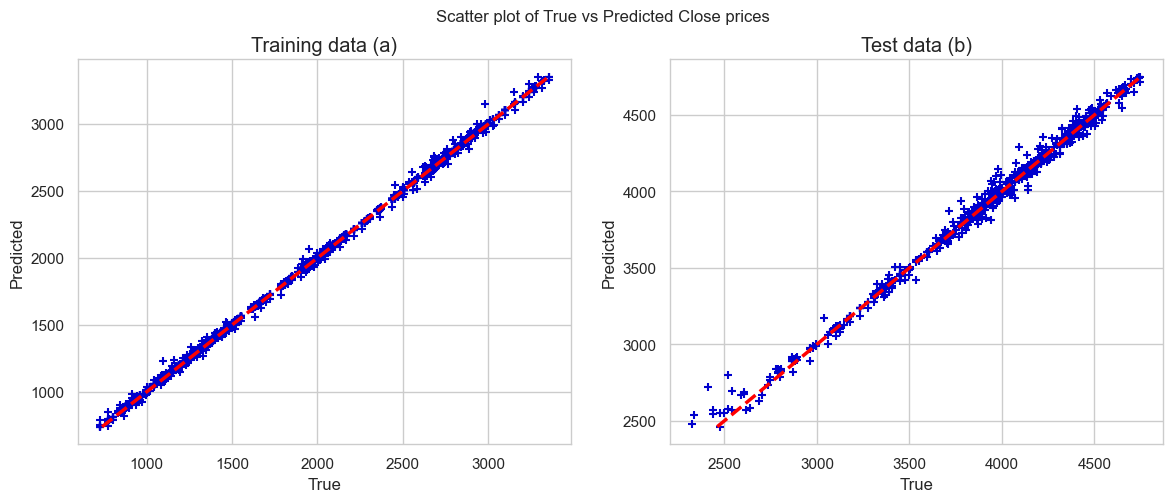

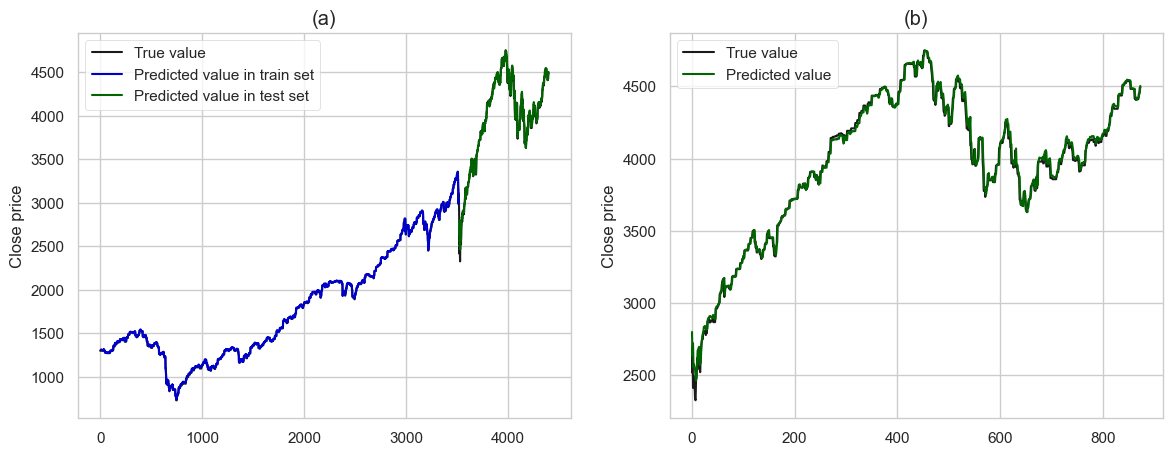

In [68]:
create_visualization(sl_model_output)

# ARO Epoch - 10 , Population - 5

In [22]:
# Define the objective function for ARO using RMSE
def objective_function(solution):
    neurons = int(solution[0])  # Number of neurons in LSTM layer
    optimizer = solution[1]
    learning_rate = solution[2]
    batch_size = int(solution[3])

    print("============================================= Running For =============================================")

    print("Values used are : (neurons, optimizer, learning rate, batch size)")
    print(neurons)
    print(optimizer)
    print(learning_rate)
    print(batch_size)

    lstm_model = build_single_layer_LSTM(layers=[neurons], time_step= 5, num_features=num_features, optimizer=optimizer, learning_rate=learning_rate,verbose=0)
    callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience= 5)
    # Train the model using X_train and y_train
    lstm_model.fit(X_train, y_train, epochs=50, batch_size=batch_size, callbacks=[callback],verbose=0)

    ypred = min_max_inverse_transform(lstm_model.predict(X_test).ravel(), min_test, max_test)
    ytest = min_max_inverse_transform(y_test, min_test, max_test)

    mse =  np.mean((ytest - ypred)**2)
    rmse = np.sqrt(mse)

    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print("=============================================================================================")
    return rmse

# Define the bounds for neurons and dropout rate
neurons_bounds = (10,200)  # Assuming a range for neurons (you can adjust this)
optimizers = ('Adam','Adagrad','Nadam')
learning_rates = (0.001,0.1)
batches = (8,32)

bound = (FloatVar(lb=neurons_bounds[0], ub=neurons_bounds[1], name="neurons"),
         StringVar(valid_sets=optimizers, name="optimizer"),
         FloatVar(lb=learning_rates[0], ub=learning_rates[1], name="learning_rate"),
         FloatVar(lb=batches[0], ub=batches[1], name="batch_size"))

problem_dict = {
    "bounds": bound,
    "obj_func": objective_function,
    "minmax": "min",
}

# Initialize ARO optimizer
model = ARO.IARO(epoch=10, pop_size=5) #epoch = 15 , population size - 25

# Solve the optimization problem
best_hyperparameters = model.solve(problem_dict)

print("Optimizers : 0 for Adam, 1 for Adagrad, 2 for Nadam")
print("Best Hyperparameters (Neurons, Optimizer, Learning Rate, Batch):", best_hyperparameters.solution)


============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
159
2.0
0.08247652604765027
9

22/22 [==============================] - 1s 5ms/step


2024/01/03 09:33:08 PM, INFO, mealpy.swarm_based.ARO.IARO: Solving single objective optimization problem.


Root Mean Squared Error (RMSE): 796.7799
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
137
0.0
0.025607947489921606
18
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 22.5219
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
52
0.0
0.027482993246535668
9
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 19.0510
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
41
0.0
0.006631181995486877
15
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 22.1547
============================================= Running For ===================

2024/01/03 09:36:27 PM, INFO, mealpy.swarm_based.ARO.IARO: >>>Problem: P, Epoch: 1, Current best: 19.050952166379496, Global best: 19.050952166379496, Runtime: 94.64637 seconds


Root Mean Squared Error (RMSE): 34.7210
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
118
0.0
0.02806729909565798
27
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 53.2133
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
200
0.0
0.025607947489921606
32
22/22 [==============================] - 1s 5ms/step
Root Mean Squared Error (RMSE): 24.1951
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
41
0.0
0.006631181995486877
15
22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 24.2049
============================================= Running For ===================

2024/01/03 09:38:10 PM, INFO, mealpy.swarm_based.ARO.IARO: >>>Problem: P, Epoch: 2, Current best: 19.050952166379496, Global best: 19.050952166379496, Runtime: 102.08620 seconds


Root Mean Squared Error (RMSE): 22.1387
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
137
0.0
0.010433091839593945
18
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 24.5299
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
34
0.0
0.028958370275060315
30
22/22 [==============================] - 0s 3ms/step
Root Mean Squared Error (RMSE): 23.3846
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
52
0.0
0.0027905100113803094
9
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 23.1975
============================================= Running For ===================

2024/01/03 09:40:40 PM, INFO, mealpy.swarm_based.ARO.IARO: >>>Problem: P, Epoch: 3, Current best: 19.050952166379496, Global best: 19.050952166379496, Runtime: 150.76925 seconds


Root Mean Squared Error (RMSE): 38.5946
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
10
0.0
0.001
13
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 32.2227
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
112
0.0
0.03102516775780939
30
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 28.4862
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
200
0.0
0.025607947489921606
18
22/22 [==============================] - 1s 6ms/step
Root Mean Squared Error (RMSE): 41.6777
============================================= Running For ==================================

2024/01/03 09:42:41 PM, INFO, mealpy.swarm_based.ARO.IARO: >>>Problem: P, Epoch: 4, Current best: 19.050952166379496, Global best: 19.050952166379496, Runtime: 120.43304 seconds


Root Mean Squared Error (RMSE): 33.6678
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
190
0.0
0.025607947489921606
29
22/22 [==============================] - 1s 5ms/step
Root Mean Squared Error (RMSE): 46.8138
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
102
0.0
0.053099046670302644
9
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 43.3863
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
200
0.0
0.05995304766982068
32
22/22 [==============================] - 1s 5ms/step
Root Mean Squared Error (RMSE): 33.4232
============================================= Running For ===================

2024/01/03 09:44:06 PM, INFO, mealpy.swarm_based.ARO.IARO: >>>Problem: P, Epoch: 5, Current best: 19.050952166379496, Global best: 19.050952166379496, Runtime: 85.06759 seconds


Root Mean Squared Error (RMSE): 38.1863
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
137
0.0
0.029809207735604554
32
22/22 [==============================] - 1s 5ms/step
Root Mean Squared Error (RMSE): 31.2642
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
10
0.0
0.001
9
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 25.9999
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
41
0.0
0.006631181995486877
15
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 26.3810
============================================= Running For ===================================

2024/01/03 09:46:10 PM, INFO, mealpy.swarm_based.ARO.IARO: >>>Problem: P, Epoch: 6, Current best: 19.050952166379496, Global best: 19.050952166379496, Runtime: 123.93687 seconds


Root Mean Squared Error (RMSE): 23.2486
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
141
0.0
0.026475758744895928
23
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 41.4194
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
75
0.0
0.027482993246535668
14
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 20.9929
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
10
0.0
0.0016730185581471388
15
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 42.7951
============================================= Running For ==================

2024/01/03 09:47:48 PM, INFO, mealpy.swarm_based.ARO.IARO: >>>Problem: P, Epoch: 7, Current best: 19.050952166379496, Global best: 19.050952166379496, Runtime: 98.16987 seconds


Root Mean Squared Error (RMSE): 25.7860
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
84
0.0
0.0157467248917622
18
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 27.7508
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
52
0.0
0.027482993246535668
10
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 30.0452
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
41
0.0
0.006631181995486877
8
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 22.3510
============================================= Running For =======================

2024/01/03 09:49:23 PM, INFO, mealpy.swarm_based.ARO.IARO: >>>Problem: P, Epoch: 8, Current best: 19.050952166379496, Global best: 19.050952166379496, Runtime: 95.23896 seconds


Root Mean Squared Error (RMSE): 34.9260
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
186
0.0
0.025607947489921606
25
22/22 [==============================] - 1s 5ms/step
Root Mean Squared Error (RMSE): 41.5502
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
26
0.0
0.013795988120648315
9
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 19.4514
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
41
0.0
0.006631181995486877
18
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 23.5014
============================================= Running For ====================

2024/01/03 09:51:16 PM, INFO, mealpy.swarm_based.ARO.IARO: >>>Problem: P, Epoch: 9, Current best: 19.050952166379496, Global best: 19.050952166379496, Runtime: 112.82990 seconds


Root Mean Squared Error (RMSE): 20.6614
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
137
0.0
0.025607947489921606
18
22/22 [==============================] - 1s 5ms/step
Root Mean Squared Error (RMSE): 19.1525
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
52
0.0
0.027482993246535668
9
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 23.5589
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
41
0.0
0.006631181995486877
15
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 27.1630
============================================= Running For ====================

2024/01/03 09:52:59 PM, INFO, mealpy.swarm_based.ARO.IARO: >>>Problem: P, Epoch: 10, Current best: 19.050952166379496, Global best: 19.050952166379496, Runtime: 103.07659 seconds


Root Mean Squared Error (RMSE): 30.8337
Optimizers : 0 for Adam, 1 for Adagrad, 2 for Nadam
Best Hyperparameters (Neurons, Optimizer, Learning Rate, Batch): [5.28196312e+01 0.00000000e+00 2.74829932e-02 9.92145083e+00]


In [23]:
print(best_hyperparameters.solution)

neurons = int(best_hyperparameters.solution[0])
optimizer = int(best_hyperparameters.solution[1])
learning_rate = round(best_hyperparameters.solution[2],4)
batch_size = int(best_hyperparameters.solution[3])

print("=======================================================")
print("Best Hyper-parameters")
print("=======================================================")
print("LSTM Layer neurons : "+str(neurons))
print("Optimizer : "+str(optimizer))
print("Learning Rate : "+str(learning_rate))
print("Batch Size : "+str(batch_size))


[5.28196312e+01 0.00000000e+00 2.74829932e-02 9.92145083e+00]
Best Hyper-parameters
LSTM Layer neurons : 52
Optimizer : 0
Learning Rate : 0.0275
Batch Size : 9


# Epoch - 10, Population - 15

In [25]:
# Define the objective function for ARO using RMSE
def objective_function(solution):
    neurons = int(solution[0])  # Number of neurons in LSTM layer
    optimizer = solution[1]
    learning_rate = solution[2]
    batch_size = int(solution[3])

    print("============================================= Running For =============================================")

    print("Values used are : (neurons, optimizer, learning rate, batch size)")
    print(neurons)
    print(optimizer)
    print(learning_rate)
    print(batch_size)

    lstm_model = build_single_layer_LSTM(layers=[neurons], time_step= 5, num_features=num_features, optimizer=optimizer, learning_rate=learning_rate,verbose=0)
    callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience= 5)
    # Train the model using X_train and y_train
    lstm_model.fit(X_train, y_train, epochs=50, batch_size=batch_size, callbacks=[callback],verbose=0)

    ypred = min_max_inverse_transform(lstm_model.predict(X_test).ravel(), min_test, max_test)
    ytest = min_max_inverse_transform(y_test, min_test, max_test)

    mse =  np.mean((ytest - ypred)**2)
    rmse = np.sqrt(mse)

    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print("=============================================================================================")
    return rmse

# Define the bounds for neurons and dropout rate
neurons_bounds = (10,200)  # Assuming a range for neurons (you can adjust this)
optimizers = ('Adam','Adagrad','Nadam')
learning_rates = (0.001,0.1)
batches = (8,32)

bound = (FloatVar(lb=neurons_bounds[0], ub=neurons_bounds[1], name="neurons"),
         StringVar(valid_sets=optimizers, name="optimizer"),
         FloatVar(lb=learning_rates[0], ub=learning_rates[1], name="learning_rate"),
         FloatVar(lb=batches[0], ub=batches[1], name="batch_size"))

problem_dict = {
    "bounds": bound,
    "obj_func": objective_function,
    "minmax": "min",
}

# Initialize ARO optimizer
model = ARO.IARO(epoch=10, pop_size=15) #epoch = 15 , population size - 25

# Solve the optimization problem
best_hyperparameters = model.solve(problem_dict)

print("Optimizers : 0 for Adam, 1 for Adagrad, 2 for Nadam")
print("Best Hyperparameters (Neurons, Optimizer, Learning Rate, Batch):", best_hyperparameters.solution)


============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
85
0.0
0.07771444265499292
23
22/22 [==============================] - 1s 4ms/step


2024/01/03 09:53:50 PM, INFO, mealpy.swarm_based.ARO.IARO: Solving single objective optimization problem.


Root Mean Squared Error (RMSE): 26.5672
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
17
0.0
0.011217295134121678
10
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 35.9936
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
159
0.0
0.06890333822084585
25
22/22 [==============================] - 1s 6ms/step
Root Mean Squared Error (RMSE): 25.1367
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
94
0.0
0.08372196283955181
29
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 20.5574
============================================= Running For =====================

22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 28.5318
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
16
0.0
0.006793965389640574
26
22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 33.6890
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
14
2.0
0.05106216413445241
32
22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 39.9001
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
14
2.0
0.0511108836783559
10
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 38.7493
============================

2024/01/03 10:04:02 PM, INFO, mealpy.swarm_based.ARO.IARO: >>>Problem: P, Epoch: 1, Current best: 19.575126080101178, Global best: 19.575126080101178, Runtime: 299.25136 seconds


Root Mean Squared Error (RMSE): 51.6319
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
41
0.0
0.06487575538190786
9
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 19.8990
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
159
0.0
0.06890333822084585
25
22/22 [==============================] - 1s 5ms/step
Root Mean Squared Error (RMSE): 23.0628
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
10
2.0
0.1
28
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 65.0810
============================================= Running For =======================================

2024/01/03 10:08:55 PM, INFO, mealpy.swarm_based.ARO.IARO: >>>Problem: P, Epoch: 2, Current best: 17.389382281354532, Global best: 17.389382281354532, Runtime: 293.57480 seconds


Root Mean Squared Error (RMSE): 25.9122
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
41
0.0
0.06487575538190786
9
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 21.5356
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
10
0.0
0.001
8
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 28.1976
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
171
0.0
0.0035122509248088143
16
22/22 [==============================] - 1s 5ms/step
Root Mean Squared Error (RMSE): 26.0047
============================================= Running For ====================================

2024/01/03 10:15:35 PM, INFO, mealpy.swarm_based.ARO.IARO: >>>Problem: P, Epoch: 3, Current best: 17.389382281354532, Global best: 17.389382281354532, Runtime: 400.07692 seconds


Root Mean Squared Error (RMSE): 44.9576
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
41
0.0
0.1
15
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 24.5411
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
10
2.0
0.02923101232830887
18
22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 21.8601
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
200
0.0
0.056051005698901334
19
22/22 [==============================] - 1s 5ms/step
Root Mean Squared Error (RMSE): 23.1988
============================================= Running For =====================================

2024/01/03 10:20:49 PM, INFO, mealpy.swarm_based.ARO.IARO: >>>Problem: P, Epoch: 4, Current best: 17.389382281354532, Global best: 17.389382281354532, Runtime: 313.87028 seconds


Root Mean Squared Error (RMSE): 29.7980
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
10
0.0
0.0693167839651984
8
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 42.5916
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
94
0.0
0.1
32
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 35.8182
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
94
0.0
0.08394264500079705
29
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 20.5511
============================================= Running For =========================================

2024/01/03 10:26:06 PM, INFO, mealpy.swarm_based.ARO.IARO: >>>Problem: P, Epoch: 5, Current best: 17.389382281354532, Global best: 17.389382281354532, Runtime: 316.46517 seconds


Root Mean Squared Error (RMSE): 49.6628
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
36
0.0
0.08394264500079705
29
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 28.1529
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
10
2.0
0.029165707067662305
28
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 29.6280
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
95
0.0
0.08394264500079705
29
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 87.6394
============================================= Running For ======================

2024/01/03 10:31:21 PM, INFO, mealpy.swarm_based.ARO.IARO: >>>Problem: P, Epoch: 6, Current best: 17.389382281354532, Global best: 17.389382281354532, Runtime: 314.96192 seconds


Root Mean Squared Error (RMSE): 20.7841
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
22
0.0
0.03095440992555347
8
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 28.2856
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
10
1.0
0.018492604726295485
18
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 43.5456
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
17
0.0
0.03409855420512523
8
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 27.2562
============================================= Running For ========================

2024/01/03 10:38:39 PM, INFO, mealpy.swarm_based.ARO.IARO: >>>Problem: P, Epoch: 7, Current best: 17.389382281354532, Global best: 17.389382281354532, Runtime: 438.45544 seconds


Root Mean Squared Error (RMSE): 31.4031
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
48
0.0
0.07543478856673581
10
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 21.0095
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
10
0.0
0.014247783610097297
9
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 27.1843
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
94
0.0
0.08394264500079705
32
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 56.0682
============================================= Running For =======================

2024/01/03 10:44:11 PM, INFO, mealpy.swarm_based.ARO.IARO: >>>Problem: P, Epoch: 8, Current best: 17.389382281354532, Global best: 17.389382281354532, Runtime: 331.49467 seconds


Root Mean Squared Error (RMSE): 20.4167
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
68
0.0
0.06487575538190786
9
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 22.0826
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
10
1.0
0.028417850762663822
18
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 56.1045
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
106
0.0
0.09426045664377919
32
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 34.1385
============================================= Running For ======================

2024/01/03 10:50:42 PM, INFO, mealpy.swarm_based.ARO.IARO: >>>Problem: P, Epoch: 9, Current best: 17.389382281354532, Global best: 17.389382281354532, Runtime: 391.07834 seconds


Root Mean Squared Error (RMSE): 23.0182
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
41
0.0
0.06487575538190786
9
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 27.5875
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
10
2.0
0.02923101232830887
18
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 23.6422
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
94
0.0
0.08394264500079705
29
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 22.7354
============================================= Running For ========================

2024/01/03 10:55:16 PM, INFO, mealpy.swarm_based.ARO.IARO: >>>Problem: P, Epoch: 10, Current best: 17.389382281354532, Global best: 17.389382281354532, Runtime: 274.19305 seconds


Root Mean Squared Error (RMSE): 62.2838
Optimizers : 0 for Adam, 1 for Adagrad, 2 for Nadam
Best Hyperparameters (Neurons, Optimizer, Learning Rate, Batch): [10.          0.          0.0167757  10.68831509]


In [26]:
print(best_hyperparameters.solution)

neurons = int(best_hyperparameters.solution[0])
optimizer = int(best_hyperparameters.solution[1])
learning_rate = round(best_hyperparameters.solution[2],4)
batch_size = int(best_hyperparameters.solution[3])

print("=======================================================")
print("Best Hyper-parameters")
print("=======================================================")
print("LSTM Layer neurons : "+str(neurons))
print("Optimizer : "+str(optimizer))
print("Learning Rate : "+str(learning_rate))
print("Batch Size : "+str(batch_size))


[10.          0.          0.0167757  10.68831509]
Best Hyper-parameters
LSTM Layer neurons : 10
Optimizer : 0
Learning Rate : 0.0168
Batch Size : 10


# ARO Epoch - 10, Population - 50

In [20]:
# Define the objective function for ARO using RMSE
def objective_function(solution):
    neurons = int(solution[0])  # Number of neurons in LSTM layer
    optimizer = solution[1]
    learning_rate = solution[2]
    batch_size = int(solution[3])

    print("============================================= Running For =============================================")

    print("Values used are : (neurons, optimizer, learning rate, batch size)")
    print(neurons)
    print(optimizer)
    print(learning_rate)
    print(batch_size)

    lstm_model = build_single_layer_LSTM(layers=[neurons], time_step= 5, num_features=num_features, optimizer=optimizer, learning_rate=learning_rate,verbose=0)
    callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience= 5)
    # Train the model using X_train and y_train
    lstm_model.fit(X_train, y_train, epochs=50, batch_size=batch_size, callbacks=[callback],verbose=0)

    ypred = min_max_inverse_transform(lstm_model.predict(X_test).ravel(), min_test, max_test)
    ytest = min_max_inverse_transform(y_test, min_test, max_test)

    mse =  np.mean((ytest - ypred)**2)
    rmse = np.sqrt(mse)

    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print("=============================================================================================")
    return rmse

# Define the bounds for neurons and dropout rate
neurons_bounds = (10,200)  # Assuming a range for neurons (you can adjust this)
optimizers = ('Adam','Adagrad','Nadam')
learning_rates = (0.001,0.1)
batches = (8,32)

bound = (FloatVar(lb=neurons_bounds[0], ub=neurons_bounds[1], name="neurons"),
         StringVar(valid_sets=optimizers, name="optimizer"),
         FloatVar(lb=learning_rates[0], ub=learning_rates[1], name="learning_rate"),
         FloatVar(lb=batches[0], ub=batches[1], name="batch_size"))

problem_dict = {
    "bounds": bound,
    "obj_func": objective_function,
    "minmax": "min",
}

# Initialize ARO optimizer
model = ARO.IARO(epoch=10, pop_size=50) #epoch = 15 , population size - 25

# Solve the optimization problem
best_hyperparameters = model.solve(problem_dict)

print("Optimizers : 0 for Adam, 1 for Adagrad, 2 for Nadam")
print("Best Hyperparameters (Neurons, Optimizer, Learning Rate, Batch):", best_hyperparameters.solution)


============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
167
1.0
0.058862219987794916
23

22/22 [==============================] - 1s 5ms/step


2024/01/03 11:05:08 PM, INFO, mealpy.swarm_based.ARO.IARO: Solving single objective optimization problem.


Root Mean Squared Error (RMSE): 23.6383
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
63
2.0
0.0019454359274411856
14
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 27.8993
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
32
2.0
0.05858163088114514
9
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 22.2647
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
74
2.0
0.04562463131240118
11
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 33.6531
============================================= Running For ======================

22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 25.3193
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
65
1.0
0.01601320248996085
10
22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 24.2483
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
112
1.0
0.01752606408627141
12
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 24.8651
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
131
2.0
0.0622885760626171
23
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 47.0519
===========================

22/22 [==============================] - 1s 5ms/step
Root Mean Squared Error (RMSE): 78.6187
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
200
2.0
0.05451463391993797
8
22/22 [==============================] - 1s 6ms/step
Root Mean Squared Error (RMSE): 20.1599
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
115
0.0
0.09841809711634254
20
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 75.9015
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
62
2.0
0.019250373262636535
32
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 30.3983
==========================

22/22 [==============================] - 1s 5ms/step
Root Mean Squared Error (RMSE): 53.7102
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
132
0.0
0.07270063210444476
8
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 29.9198
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
178
2.0
0.031048146605245536
32
22/22 [==============================] - 1s 5ms/step
Root Mean Squared Error (RMSE): 28.0245
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
132
0.0
0.016989293338786023
8
22/22 [==============================] - 1s 6ms/step
Root Mean Squared Error (RMSE): 21.0942
=========================

2024/01/03 11:53:32 PM, INFO, mealpy.swarm_based.ARO.IARO: >>>Problem: P, Epoch: 1, Current best: 19.148457519948135, Global best: 19.148457519948135, Runtime: 1485.59780 seconds


Root Mean Squared Error (RMSE): 27.3891
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
200
0.0
0.1
20
22/22 [==============================] - 1s 5ms/step
Root Mean Squared Error (RMSE): 387.9214
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
10
1.0
0.001
11
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 252.2024
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
41
0.0
0.08330524824281374
32
22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 23.1566
============================================= Running For =============================================
Valu

22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 25.0714
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
193
0.0
0.01324246016625049
12
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 23.7152
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
10
2.0
0.0019454359274411856
8
22/22 [==============================] - 1s 2ms/step
Root Mean Squared Error (RMSE): 24.0381
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
50
2.0
0.1
32
22/22 [==============================] - 1s 2ms/step
Root Mean Squared Error (RMSE): 47.4410
==========================================

22/22 [==============================] - 1s 2ms/step
Root Mean Squared Error (RMSE): 22.3959
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
82
2.0
0.04893451485881764
9
22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 31.6202
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
200
2.0
0.1
8
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 97.8721
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
32
0.0
0.001
8
22/22 [==============================] - 1s 2ms/step
Root Mean Squared Error (RMSE): 32.2105
============================================= Running For ==

2024/01/04 12:20:19 AM, INFO, mealpy.swarm_based.ARO.IARO: >>>Problem: P, Epoch: 2, Current best: 18.29507507023919, Global best: 18.29507507023919, Runtime: 1606.64283 seconds


Root Mean Squared Error (RMSE): 31.6643
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
132
0.0
0.0411776589553138
8
22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 17.6717
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
10
0.0
0.001
8
22/22 [==============================] - 1s 2ms/step
Root Mean Squared Error (RMSE): 36.8353
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
44
0.0
0.09247646049709073
32
22/22 [==============================] - 1s 2ms/step
Root Mean Squared Error (RMSE): 22.0215
============================================= Running For =======================================

22/22 [==============================] - 1s 2ms/step
Root Mean Squared Error (RMSE): 23.3161
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
133
1.0
0.1
9
22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 22.8750
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
196
1.0
0.008439704184583993
23
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 50.3430
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
131
1.0
0.04102980501082116
32
22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 24.6804
=========================================

22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 28.4336
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
65
2.0
0.1
15
22/22 [==============================] - 1s 2ms/step
Root Mean Squared Error (RMSE): 35.4023
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
161
2.0
0.06604615521311001
8
22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 235.4035
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
75
0.0
0.001
11
22/22 [==============================] - 1s 2ms/step
Root Mean Squared Error (RMSE): 25.6799
============================================= Running For

2024/01/04 12:44:16 AM, INFO, mealpy.swarm_based.ARO.IARO: >>>Problem: P, Epoch: 3, Current best: 17.671731960366095, Global best: 17.671731960366095, Runtime: 1436.94155 seconds


Root Mean Squared Error (RMSE): 28.7511
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
149
0.0
0.00668822537528446
13
22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 21.6143
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
32
0.0
0.001
8
22/22 [==============================] - 1s 2ms/step
Root Mean Squared Error (RMSE): 23.0123
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
96
0.0
0.1
32
22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 38.3600
============================================= Running For =============================================
Values 

22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 20.2546
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
130
2.0
0.05349507876293773
9
22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 41.3156
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
41
0.0
0.08330524824281374
21
22/22 [==============================] - 1s 2ms/step
Root Mean Squared Error (RMSE): 19.2672
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
200
1.0
0.07949154557740873
32
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 24.1908
===========================

22/22 [==============================] - 1s 2ms/step
Root Mean Squared Error (RMSE): 26.8282
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
60
1.0
0.07889455950005776
8
22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 23.3233
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
10
0.0
0.06798334246800736
21
22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 24.1446
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
122
0.0
0.02596461219662361
19
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 86.5811
============================

2024/01/04 01:07:13 AM, INFO, mealpy.swarm_based.ARO.IARO: >>>Problem: P, Epoch: 4, Current best: 17.671731960366095, Global best: 17.671731960366095, Runtime: 1377.44806 seconds


Root Mean Squared Error (RMSE): 31.3253
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
200
0.0
0.052193093993978784
27
22/22 [==============================] - 1s 5ms/step
Root Mean Squared Error (RMSE): 24.6062
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
27
0.0
0.001
8
22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 38.4979
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
49
0.0
0.09247646049709073
32
22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 18.5507
============================================= Running For ====================================

22/22 [==============================] - 1s 5ms/step
Root Mean Squared Error (RMSE): 24.5850
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
200
1.0
0.1
9
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 23.1647
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
34
0.0
0.014685288427763989
10
22/22 [==============================] - 1s 2ms/step
Root Mean Squared Error (RMSE): 23.4988
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
200
1.0
0.09437168082019734
32
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 23.7801
==========================================

22/22 [==============================] - 1s 2ms/step
Root Mean Squared Error (RMSE): 22.3480
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
119
1.0
0.1
17
22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 28.7869
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
10
0.0
0.05798228248809434
18
22/22 [==============================] - 1s 2ms/step
Root Mean Squared Error (RMSE): 31.5152
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
10
0.0
0.016256703376000235
8
22/22 [==============================] - 1s 2ms/step
Root Mean Squared Error (RMSE): 19.9012
===========================================

2024/01/04 01:37:12 AM, INFO, mealpy.swarm_based.ARO.IARO: >>>Problem: P, Epoch: 5, Current best: 17.671731960366095, Global best: 17.671731960366095, Runtime: 1798.62224 seconds


Root Mean Squared Error (RMSE): 21.5717
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
132
0.0
0.0411776589553138
8
22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 23.9377
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
133
1.0
0.1
11
22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 30.4825
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
49
0.0
0.09247646049709073
32
22/22 [==============================] - 1s 2ms/step
Root Mean Squared Error (RMSE): 37.2326
============================================= Running For =======================================

22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 24.9961
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
133
1.0
0.0690060285818861
8
22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 23.1183
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
41
0.0
0.08330524824281374
32
22/22 [==============================] - 1s 2ms/step
Root Mean Squared Error (RMSE): 23.4096
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
10
0.0
0.001
8
22/22 [==============================] - 1s 2ms/step
Root Mean Squared Error (RMSE): 45.5331
============================================

22/22 [==============================] - 1s 2ms/step
Root Mean Squared Error (RMSE): 27.3984
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
60
1.0
0.1
11
22/22 [==============================] - 1s 2ms/step
Root Mean Squared Error (RMSE): 23.3900
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
10
0.0
0.06798334246800736
21
22/22 [==============================] - 1s 2ms/step
Root Mean Squared Error (RMSE): 21.6278
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
10
0.0
0.017731538888769757
8
22/22 [==============================] - 1s 2ms/step
Root Mean Squared Error (RMSE): 22.3793
============================================

2024/01/04 02:00:36 AM, INFO, mealpy.swarm_based.ARO.IARO: >>>Problem: P, Epoch: 6, Current best: 17.671731960366095, Global best: 17.671731960366095, Runtime: 1404.03230 seconds


Root Mean Squared Error (RMSE): 32.6313
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
147
0.0
0.05527990686263959
8
22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 218.6048
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
10
0.0
0.031932031181174464
8
22/22 [==============================] - 1s 2ms/step
Root Mean Squared Error (RMSE): 22.7500
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
68
0.0
0.1
32
22/22 [==============================] - 1s 2ms/step
Root Mean Squared Error (RMSE): 62.1525
============================================= Running For ======================================

22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 20.5232
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
200
0.0
0.06996424712044064
9
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 23.3650
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
10
0.0
0.08330524824281374
8
22/22 [==============================] - 1s 2ms/step
Root Mean Squared Error (RMSE): 23.5286
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
200
1.0
0.1
32
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 22.9763
============================================

22/22 [==============================] - 1s 2ms/step
Root Mean Squared Error (RMSE): 19.5047
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
43
0.0
0.06742099824348834
8
22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 29.6131
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
11
0.0
0.08377037707647839
21
22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 48.5924
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
200
0.0
0.025431911218705024
8
22/22 [==============================] - 1s 6ms/step
Root Mean Squared Error (RMSE): 39.0136
============================

2024/01/04 02:26:53 AM, INFO, mealpy.swarm_based.ARO.IARO: >>>Problem: P, Epoch: 7, Current best: 17.671731960366095, Global best: 17.671731960366095, Runtime: 1576.66983 seconds


Root Mean Squared Error (RMSE): 28.5077
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
132
0.0
0.016989293338786023
8
22/22 [==============================] - 1s 5ms/step
Root Mean Squared Error (RMSE): 23.4338
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
32
0.0
0.001
8
22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 26.7024
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
62
0.0
0.09247646049709073
32
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 20.0366
============================================= Running For =====================================

22/22 [==============================] - 1s 6ms/step
Root Mean Squared Error (RMSE): 31.8647
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
133
0.0
0.1
9
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 47.0406
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
41
0.0
0.1
31
22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 20.4890
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
200
1.0
0.1
32
22/22 [==============================] - 1s 7ms/step
Root Mean Squared Error (RMSE): 22.6315
============================================= Running For =================

22/22 [==============================] - 1s 2ms/step
Root Mean Squared Error (RMSE): 24.2904
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
57
1.0
0.07889455950005776
8
22/22 [==============================] - 1s 2ms/step
Root Mean Squared Error (RMSE): 25.8125
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
10
0.0
0.04738216175937093
21
22/22 [==============================] - 1s 2ms/step
Root Mean Squared Error (RMSE): 40.0372
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
10
0.0
0.013751394956671147
8
22/22 [==============================] - 1s 2ms/step
Root Mean Squared Error (RMSE): 21.0060
=============================

2024/01/04 03:06:47 AM, INFO, mealpy.swarm_based.ARO.IARO: >>>Problem: P, Epoch: 8, Current best: 17.671731960366095, Global best: 17.671731960366095, Runtime: 2394.65713 seconds


Root Mean Squared Error (RMSE): 22.0211
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
132
0.0
0.0411776589553138
8
22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 108.0141
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
32
0.0
0.001
8
22/22 [==============================] - 1s 2ms/step
Root Mean Squared Error (RMSE): 21.1252
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
49
0.0
0.1
32
22/22 [==============================] - 1s 2ms/step
Root Mean Squared Error (RMSE): 24.8296
============================================= Running For =============================================
Values u

22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 37.3668
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
135
1.0
0.1
9
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 22.1021
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
33
0.0
0.08330524824281374
21
22/22 [==============================] - 1s 2ms/step
Root Mean Squared Error (RMSE): 23.7430
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
112
1.0
0.1
17
22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 27.4180
============================================= Running For =

22/22 [==============================] - 1s 2ms/step
Root Mean Squared Error (RMSE): 25.1074
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
43
0.0
0.057770360661280704
8
22/22 [==============================] - 1s 2ms/step
Root Mean Squared Error (RMSE): 22.3065
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
10
0.0
0.06798334246800736
17
22/22 [==============================] - 1s 2ms/step
Root Mean Squared Error (RMSE): 28.7723
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
10
0.0
0.01510607448664654
8
22/22 [==============================] - 1s 2ms/step
Root Mean Squared Error (RMSE): 26.0832
=============================

2024/01/04 03:33:08 AM, INFO, mealpy.swarm_based.ARO.IARO: >>>Problem: P, Epoch: 9, Current best: 17.671731960366095, Global best: 17.671731960366095, Runtime: 1580.43365 seconds


Root Mean Squared Error (RMSE): 23.1971
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
132
0.0
0.0411776589553138
8
22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 19.4542
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
32
0.0
0.001
8
22/22 [==============================] - 1s 2ms/step
Root Mean Squared Error (RMSE): 26.8246
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
49
0.0
0.09247646049709073
32
22/22 [==============================] - 1s 2ms/step
Root Mean Squared Error (RMSE): 23.5795
============================================= Running For =======================================

22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 42.3401
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
135
1.0
0.1
9
22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 22.0619
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
41
0.0
0.08330524824281374
21
22/22 [==============================] - 1s 2ms/step
Root Mean Squared Error (RMSE): 28.3509
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
200
1.0
0.1
32
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 23.3077
============================================= Running For =

22/22 [==============================] - 1s 2ms/step
Root Mean Squared Error (RMSE): 22.1947
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
43
0.0
0.057770360661280704
8
22/22 [==============================] - 1s 2ms/step
Root Mean Squared Error (RMSE): 19.2705
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
10
0.0
0.06798334246800736
21
22/22 [==============================] - 1s 2ms/step
Root Mean Squared Error (RMSE): 27.0423
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
10
0.0
0.016256703376000235
8
22/22 [==============================] - 1s 2ms/step
Root Mean Squared Error (RMSE): 18.8150
============================

2024/01/04 04:01:13 AM, INFO, mealpy.swarm_based.ARO.IARO: >>>Problem: P, Epoch: 10, Current best: 17.671731960366095, Global best: 17.671731960366095, Runtime: 1685.57118 seconds


Root Mean Squared Error (RMSE): 29.6351
Optimizers : 0 for Adam, 1 for Adagrad, 2 for Nadam
Best Hyperparameters (Neurons, Optimizer, Learning Rate, Batch): [1.32706328e+02 0.00000000e+00 4.11776590e-02 8.00000000e+00]


In [21]:
print(best_hyperparameters.solution)

neurons = int(best_hyperparameters.solution[0])
optimizer = int(best_hyperparameters.solution[1])
learning_rate = round(best_hyperparameters.solution[2],4)
batch_size = int(best_hyperparameters.solution[3])

print("=======================================================")
print("Best Hyper-parameters")
print("=======================================================")
print("LSTM Layer neurons : "+str(neurons))
print("Optimizer : "+str(optimizer))
print("Learning Rate : "+str(learning_rate))
print("Batch Size : "+str(batch_size))


[1.32706328e+02 0.00000000e+00 4.11776590e-02 8.00000000e+00]
Best Hyper-parameters
LSTM Layer neurons : 132
Optimizer : 0
Learning Rate : 0.0412
Batch Size : 8


# ARO Epoch - 5, Population - 100

In [39]:
# Define the objective function for ARO using RMSE
def objective_function(solution):
    neurons = int(solution[0])  # Number of neurons in LSTM layer
    optimizer = solution[1]
    learning_rate = solution[2]
    batch_size = int(solution[3])

    print("============================================= Running For =============================================")

    print("Values used are : (neurons, optimizer, learning rate, batch size)")
    print(neurons)
    print(optimizer)
    print(learning_rate)
    print(batch_size)

    lstm_model = build_single_layer_LSTM(layers=[neurons], time_step= 5, num_features=num_features, optimizer=optimizer, learning_rate=learning_rate,verbose=0)
    callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience= 5)
    # Train the model using X_train and y_train
    lstm_model.fit(X_train, y_train, epochs=50, batch_size=batch_size, callbacks=[callback],verbose=0)

    ypred = min_max_inverse_transform(lstm_model.predict(X_test).ravel(), min_test, max_test)
    ytest = min_max_inverse_transform(y_test, min_test, max_test)

    mse =  np.mean((ytest - ypred)**2)
    rmse = np.sqrt(mse)

    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print("=============================================================================================")
    return rmse

# Define the bounds for neurons and dropout rate
neurons_bounds = (10,200)  # Assuming a range for neurons (you can adjust this)
optimizers = ('Adam','Adagrad','Nadam')
learning_rates = (0.001,0.1)
batches = (8,32)

bound = (FloatVar(lb=neurons_bounds[0], ub=neurons_bounds[1], name="neurons"),
         StringVar(valid_sets=optimizers, name="optimizer"),
         FloatVar(lb=learning_rates[0], ub=learning_rates[1], name="learning_rate"),
         FloatVar(lb=batches[0], ub=batches[1], name="batch_size"))

problem_dict = {
    "bounds": bound,
    "obj_func": objective_function,
    "minmax": "min",
}

# Initialize ARO optimizer
model = ARO.IARO(epoch=5, pop_size=100) #epoch = 15 , population size - 25

# Solve the optimization problem
best_hyperparameters = model.solve(problem_dict)

print("Optimizers : 0 for Adam, 1 for Adagrad, 2 for Nadam")
print("Best Hyperparameters (Neurons, Optimizer, Learning Rate, Batch):", best_hyperparameters.solution)


============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
106
0.0
0.05684421048735835
17
22/22 [==============================] - 1s 5ms/step


2024/01/04 09:12:14 AM, INFO, mealpy.swarm_based.ARO.IARO: Solving single objective optimization problem.


Root Mean Squared Error (RMSE): 21.5425
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
177
2.0
0.048377477333849984
19
22/22 [==============================] - 1s 5ms/step
Root Mean Squared Error (RMSE): 28.3665
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
199
2.0
0.08326119162103161
24
22/22 [==============================] - 1s 6ms/step
Root Mean Squared Error (RMSE): 48.7022
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
178
2.0
0.008879666492938927
22
22/22 [==============================] - 1s 5ms/step
Root Mean Squared Error (RMSE): 24.9237
============================================= Running For ==================

22/22 [==============================] - 1s 5ms/step
Root Mean Squared Error (RMSE): 24.0956
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
30
1.0
0.021989176138892265
12
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 25.5384
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
162
0.0
0.05008625722239784
8
22/22 [==============================] - 1s 5ms/step
Root Mean Squared Error (RMSE): 96.6247
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
126
2.0
0.043627569114155364
10
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 20.3749
=========================

22/22 [==============================] - 1s 5ms/step
Root Mean Squared Error (RMSE): 22.6331
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
132
0.0
0.08916549964615324
8
22/22 [==============================] - 1s 5ms/step
Root Mean Squared Error (RMSE): 27.5882
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
148
0.0
0.08701968722138534
22
22/22 [==============================] - 1s 5ms/step
Root Mean Squared Error (RMSE): 30.4819
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
61
1.0
0.06533264945122899
21
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 25.7365
===========================

Root Mean Squared Error (RMSE): 24.1384
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
110
1.0
0.0048392991011248915
17
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 77.9638
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
146
2.0
0.09401139730459843
13
22/22 [==============================] - 1s 5ms/step
Root Mean Squared Error (RMSE): 230.2282
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
157
2.0
0.09372453947867353
18
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 39.2929
============================================= Running For =================

22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 24.9889
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
13
1.0
0.001
28
22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 246.9498
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
200
2.0
0.087166996245507
28
22/22 [==============================] - 1s 5ms/step
Root Mean Squared Error (RMSE): 44.5239
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
193
1.0
0.061818779078863365
26
22/22 [==============================] - 1s 5ms/step
Root Mean Squared Error (RMSE): 25.0190
========================================

22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 23.2942
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
186
0.0
0.0726188061299258
18
22/22 [==============================] - 1s 5ms/step
Root Mean Squared Error (RMSE): 96.6417
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
123
1.0
0.04689039367688964
31
22/22 [==============================] - 1s 5ms/step
Root Mean Squared Error (RMSE): 27.9546
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
118
1.0
0.0507619616198099
24
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 24.0199
===========================

22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 27.7303
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
22
1.0
0.05043011307702075
18
22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 25.5735
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
93
1.0
0.052269848796614685
24
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 23.0277
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
178
2.0
0.03283697646925897
15
22/22 [==============================] - 1s 5ms/step
Root Mean Squared Error (RMSE): 26.9817
==========================

22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 35.2646
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
193
1.0
0.0941151935646811
26
22/22 [==============================] - 1s 5ms/step
Root Mean Squared Error (RMSE): 22.9663
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
200
2.0
0.08513906351085601
26
22/22 [==============================] - 1s 5ms/step
Root Mean Squared Error (RMSE): 54.5014
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
113
0.0
0.001
8
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 23.5336
=========================================

22/22 [==============================] - 1s 5ms/step
Root Mean Squared Error (RMSE): 21.2195
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
54
1.0
0.013538676783569722
8
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 30.4065
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
200
0.0
0.08059978692905256
26
22/22 [==============================] - 1s 5ms/step
Root Mean Squared Error (RMSE): 96.6438
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
130
1.0
0.08106050442131581
17
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 30.8596
==========================

2024/01/04 10:46:05 AM, INFO, mealpy.swarm_based.ARO.IARO: >>>Problem: P, Epoch: 1, Current best: 18.875627510225787, Global best: 18.875627510225787, Runtime: 2897.87979 seconds


Root Mean Squared Error (RMSE): 39.1491
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
182
0.0
0.06996284627021812
11
22/22 [==============================] - 1s 5ms/step
Root Mean Squared Error (RMSE): 27.1905
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
10
0.0
0.001
10
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 37.0542
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
178
2.0
0.008879666492938927
21
22/22 [==============================] - 1s 5ms/step
Root Mean Squared Error (RMSE): 25.9463
============================================= Running For ==================================

22/22 [==============================] - 1s 5ms/step
Root Mean Squared Error (RMSE): 25.0116
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
84
2.0
0.08201221938003292
18
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 42.8635
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
142
0.0
0.040959790114846024
8
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 55.1468
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
126
1.0
0.04510841087145469
10
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 23.9592
==========================

22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 33.5713
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
128
0.0
0.08933593609346527
24
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 105.3153
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
75
0.0
0.0457028706353987
8
22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 20.7182
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
17
0.0
0.1
23
22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 30.8305
============================================

22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 17.8259
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
10
0.0
0.033871669340732165
8
22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 28.6811
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
106
0.0
0.015298832630704137
14
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 24.2328
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
178
1.0
0.033871669340732165
8
22/22 [==============================] - 1s 5ms/step
Root Mean Squared Error (RMSE): 23.2305
=========================

22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 21.3772
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
156
2.0
0.022361147627672412
18
22/22 [==============================] - 1s 5ms/step
Root Mean Squared Error (RMSE): 38.9619
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
120
0.0
0.001
8
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 28.8253
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
106
2.0
0.026698510961943332
8
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 27.8702
=======================================

2024/01/04 11:38:25 AM, INFO, mealpy.swarm_based.ARO.IARO: >>>Problem: P, Epoch: 2, Current best: 17.82587152511118, Global best: 17.82587152511118, Runtime: 3139.96331 seconds


Root Mean Squared Error (RMSE): 59.0268
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
149
1.0
0.05186447956312629
11
22/22 [==============================] - 1s 5ms/step
Root Mean Squared Error (RMSE): 22.5904
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
20
0.0
0.001
10
22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 28.7311
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
189
2.0
0.010378428593139297
23
22/22 [==============================] - 1s 6ms/step
Root Mean Squared Error (RMSE): 42.4357
============================================= Running For ==================================

22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 26.2155
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
28
1.0
0.03515513337574301
8
22/22 [==============================] - 1s 2ms/step
Root Mean Squared Error (RMSE): 24.4046
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
157
2.0
0.1
18
22/22 [==============================] - 1s 6ms/step
Root Mean Squared Error (RMSE): 24.8168
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
85
0.0
0.057140822357596474
11
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 28.8922
===========================================

22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 22.4006
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
94
0.0
0.02978952749594316
13
22/22 [==============================] - 1s 2ms/step
Root Mean Squared Error (RMSE): 19.2608
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
159
1.0
0.03603805688242485
8
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 22.8949
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
14
0.0
0.09051519030761827
18
22/22 [==============================] - 1s 2ms/step
Root Mean Squared Error (RMSE): 22.2393
============================

22/22 [==============================] - 1s 5ms/step
Root Mean Squared Error (RMSE): 36.7263
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
200
0.0
0.024284275645879184
15
22/22 [==============================] - 1s 6ms/step
Root Mean Squared Error (RMSE): 31.6173
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
10
2.0
0.09372453947867353
8
22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 45.9580
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
136
1.0
0.1
8
22/22 [==============================] - 1s 5ms/step
Root Mean Squared Error (RMSE): 25.6970
===========================================

22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 18.7181
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
134
0.0
0.017208589534994462
13
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 24.3332
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
37
0.0
0.050880023440510756
21
22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 23.4267
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
178
1.0
0.027515623205078707
8
22/22 [==============================] - 1s 5ms/step
Root Mean Squared Error (RMSE): 24.5688
========================

2024/01/04 12:33:08 PM, INFO, mealpy.swarm_based.ARO.IARO: >>>Problem: P, Epoch: 3, Current best: 17.82587152511118, Global best: 17.82587152511118, Runtime: 3283.30020 seconds


============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
122
0.0
0.04253177817020177
9
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 26.7879
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
10
0.0
0.001
9
22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 32.3361
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
178
1.0
0.0066331129623870815
15
22/22 [==============================] - 1s 5ms/step
Root Mean Squared Error (RMSE): 41.0680
============================================= Running For =============================================
Values used are : (neurons, o

22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 24.6859
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
28
1.0
0.047792117524499626
8
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 24.9206
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
164
2.0
0.1
19
22/22 [==============================] - 1s 5ms/step
Root Mean Squared Error (RMSE): 207.2438
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
45
2.0
0.015848551277598613
8
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 19.7688
==========================================

22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 26.9531
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
155
0.0
0.0508540835181515
21
22/22 [==============================] - 1s 5ms/step
Root Mean Squared Error (RMSE): 180.6144
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
23
0.0
0.0457028706353987
8
22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 22.1105
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
14
0.0
0.05462405262490653
19
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 23.4446
=============================

22/22 [==============================] - 1s 5ms/step
Root Mean Squared Error (RMSE): 126.9563
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
200
2.0
0.04359224226203916
12
22/22 [==============================] - 1s 5ms/step
Root Mean Squared Error (RMSE): 383.3575
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
77
2.0
0.09372453947867353
18
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 38.2025
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
200
1.0
0.045503826059621146
11
22/22 [==============================] - 1s 5ms/step
Root Mean Squared Error (RMSE): 23.3541
=======================

22/22 [==============================] - 1s 5ms/step
Root Mean Squared Error (RMSE): 20.2227
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
134
0.0
0.017208589534994462
8
22/22 [==============================] - 1s 5ms/step
Root Mean Squared Error (RMSE): 20.3052
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
37
0.0
0.050880023440510756
26
22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 31.7091
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
80
1.0
0.020742166827559562
8
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 24.0073
==========================

2024/01/04 01:24:34 PM, INFO, mealpy.swarm_based.ARO.IARO: >>>Problem: P, Epoch: 4, Current best: 17.82587152511118, Global best: 17.82587152511118, Runtime: 3086.44717 seconds


Root Mean Squared Error (RMSE): 85.4643
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
149
1.0
0.05186447956312629
11
22/22 [==============================] - 1s 5ms/step
Root Mean Squared Error (RMSE): 22.9888
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
10
0.0
0.001
10
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 26.4089
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
178
2.0
0.008879666492938927
22
22/22 [==============================] - 1s 5ms/step
Root Mean Squared Error (RMSE): 29.2325
============================================= Running For ==================================

22/22 [==============================] - 1s 6ms/step
Root Mean Squared Error (RMSE): 20.5968
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
28
1.0
0.03515513337574301
8
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 27.1514
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
157
2.0
0.1
18
22/22 [==============================] - 1s 5ms/step
Root Mean Squared Error (RMSE): 47.2275
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
45
2.0
0.015848551277598613
8
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 19.0609
============================================

22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 24.0488
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
94
0.0
0.02978952749594316
13
22/22 [==============================] - 1s 5ms/step
Root Mean Squared Error (RMSE): 34.8375
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
75
0.0
0.0457028706353987
8
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 25.4502
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
14
0.0
0.1
19
22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 29.6405
============================================= 

22/22 [==============================] - 1s 5ms/step
Root Mean Squared Error (RMSE): 26.6326
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
179
2.0
0.033871669340732165
9
22/22 [==============================] - 1s 6ms/step
Root Mean Squared Error (RMSE): 21.8667
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
74
2.0
0.09372453947867353
18
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 37.4320
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
178
1.0
0.033871669340732165
8
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 23.5412
==========================

22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 23.0468
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
134
0.0
0.017208589534994462
8
22/22 [==============================] - 1s 5ms/step
Root Mean Squared Error (RMSE): 23.1065
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
37
0.0
0.050880023440510756
21
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 42.9022
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
106
2.0
0.027445151329244317
8
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 20.3698
=========================

2024/01/04 02:18:58 PM, INFO, mealpy.swarm_based.ARO.IARO: >>>Problem: P, Epoch: 5, Current best: 17.82587152511118, Global best: 17.82587152511118, Runtime: 3263.52494 seconds


Root Mean Squared Error (RMSE): 27.6823
Optimizers : 0 for Adam, 1 for Adagrad, 2 for Nadam
Best Hyperparameters (Neurons, Optimizer, Learning Rate, Batch): [1.40307824e+02 0.00000000e+00 7.65360190e-02 2.97710559e+01]


In [40]:
print(best_hyperparameters.solution)

neurons = int(best_hyperparameters.solution[0])
optimizer = int(best_hyperparameters.solution[1])
learning_rate = round(best_hyperparameters.solution[2],4)
batch_size = int(best_hyperparameters.solution[3])

print("=======================================================")
print("Best Hyper-parameters")
print("=======================================================")
print("LSTM Layer neurons : "+str(neurons))
print("Optimizer : "+str(optimizer))
print("Learning Rate : "+str(learning_rate))
print("Batch Size : "+str(batch_size))


[1.40307824e+02 0.00000000e+00 7.65360190e-02 2.97710559e+01]
Best Hyper-parameters
LSTM Layer neurons : 140
Optimizer : 0
Learning Rate : 0.0765
Batch Size : 29


# Epoch - 10, Population - 100

In [21]:
# Define the objective function for ARO using RMSE
def objective_function(solution):
    neurons = int(solution[0])  # Number of neurons in LSTM layer
    optimizer = solution[1]
    learning_rate = solution[2]
    batch_size = int(solution[3])

    print("============================================= Running For =============================================")

    print("Values used are : (neurons, optimizer, learning rate, batch size)")
    print(neurons)
    print(optimizer)
    print(learning_rate)
    print(batch_size)

    lstm_model = build_single_layer_LSTM(layers=[neurons], time_step= 5, num_features=num_features, optimizer=optimizer, learning_rate=learning_rate,verbose=0)
    callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience= 5)
    # Train the model using X_train and y_train
    lstm_model.fit(X_train, y_train, epochs=50, batch_size=batch_size, callbacks=[callback],verbose=0)

    ypred = min_max_inverse_transform(lstm_model.predict(X_test).ravel(), min_test, max_test)
    ytest = min_max_inverse_transform(y_test, min_test, max_test)

    mse =  np.mean((ytest - ypred)**2)
    rmse = np.sqrt(mse)

    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print("=============================================================================================")
    return rmse

# Define the bounds for neurons and dropout rate
neurons_bounds = (10,200)  # Assuming a range for neurons (you can adjust this)
optimizers = ('Adam','Adagrad','Nadam')
learning_rates = (0.001,0.1)
batches = (8,32)

bound = (FloatVar(lb=neurons_bounds[0], ub=neurons_bounds[1], name="neurons"),
         StringVar(valid_sets=optimizers, name="optimizer"),
         FloatVar(lb=learning_rates[0], ub=learning_rates[1], name="learning_rate"),
         FloatVar(lb=batches[0], ub=batches[1], name="batch_size"))

problem_dict = {
    "bounds": bound,
    "obj_func": objective_function,
    "minmax": "min",
}

# Initialize ARO optimizer
model = ARO.IARO(epoch=10, pop_size=100) #epoch = 15 , population size - 25

# Solve the optimization problem
best_hyperparameters = model.solve(problem_dict)

print("Optimizers : 0 for Adam, 1 for Adagrad, 2 for Nadam")
print("Best Hyperparameters (Neurons, Optimizer, Learning Rate, Batch):", best_hyperparameters.solution)


============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
68
1.0
0.018412471457296978
25

22/22 [==============================] - 1s 2ms/step


2024/01/04 02:26:33 PM, INFO, mealpy.swarm_based.ARO.IARO: Solving single objective optimization problem.


Root Mean Squared Error (RMSE): 27.9773
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
48
1.0
0.04038207289628502
12
22/22 [==============================] - 0s 1ms/step
Root Mean Squared Error (RMSE): 30.0612
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
154
0.0
0.009845741374368687
24
22/22 [==============================] - 1s 5ms/step
Root Mean Squared Error (RMSE): 27.2468
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
181
1.0
0.07604508916472187
12
22/22 [==============================] - 1s 6ms/step
Root Mean Squared Error (RMSE): 22.8618
============================================= Running For ====================

22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 37.8960
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
110
2.0
0.04198311688670156
13
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 25.1504
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
71
2.0
0.004576946769942165
22
22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 38.6078
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
102
0.0
0.0938763370073152
27
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 21.4288
==========================

22/22 [==============================] - 1s 5ms/step
Root Mean Squared Error (RMSE): 60.0814
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
54
1.0
0.03795069173856239
8
22/22 [==============================] - 0s 1ms/step
Root Mean Squared Error (RMSE): 24.4859
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
152
2.0
0.04492311917813748
24
22/22 [==============================] - 0s 2ms/step
Root Mean Squared Error (RMSE): 21.8380
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
179
2.0
0.05270685378442225
10
22/22 [==============================] - 0s 3ms/step
Root Mean Squared Error (RMSE): 24.3897
===========================

22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 25.0095
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
182
1.0
0.004379215899342547
25
22/22 [==============================] - 1s 5ms/step
Root Mean Squared Error (RMSE): 62.2573
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
162
2.0
0.06303926397751328
21
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 29.2491
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
123
2.0
0.01740636347549139
14
22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 22.5820
========================

22/22 [==============================] - 1s 2ms/step
Root Mean Squared Error (RMSE): 28.7926
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
25
0.0
0.048506062855123135
11
22/22 [==============================] - 1s 2ms/step
Root Mean Squared Error (RMSE): 23.2546
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
131
0.0
0.07969588668053729
14
22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 20.2129
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
200
2.0
0.01740636347549139
14
22/22 [==============================] - 1s 5ms/step
Root Mean Squared Error (RMSE): 27.9406
=========================

22/22 [==============================] - 1s 5ms/step
Root Mean Squared Error (RMSE): 231.6727
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
78
0.0
0.08544859843708195
19
22/22 [==============================] - 0s 2ms/step
Root Mean Squared Error (RMSE): 44.4198
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
200
2.0
0.1
32
22/22 [==============================] - 1s 6ms/step
Root Mean Squared Error (RMSE): 223.2521
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
118
1.0
0.053728837899143705
31
22/22 [==============================] - 0s 2ms/step
Root Mean Squared Error (RMSE): 22.9537
=======================================

22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 36.5817
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
116
1.0
0.001
32
22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 189.0784
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
57
0.0
0.001
32
22/22 [==============================] - 1s 2ms/step
Root Mean Squared Error (RMSE): 32.4776
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
49
2.0
0.016888432591712355
28
22/22 [==============================] - 1s 2ms/step
Root Mean Squared Error (RMSE): 27.8032
============================================= Running

22/22 [==============================] - 1s 2ms/step
Root Mean Squared Error (RMSE): 21.2846
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
200
0.0
0.07060379504118623
20
22/22 [==============================] - 1s 5ms/step
Root Mean Squared Error (RMSE): 66.9797
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
136
0.0
0.09490113998625933
19
22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 73.6363
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
173
2.0
0.06303926397751328
21
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 28.3041
=========================

22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 19.3204
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
133
0.0
0.05831634635134587
32
22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 122.9438
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
86
2.0
0.09698886966195737
24
22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 26.3403
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
109
2.0
0.06048750375150647
12
22/22 [==============================] - 1s 3ms/step


2024/01/04 03:49:21 PM, INFO, mealpy.swarm_based.ARO.IARO: >>>Problem: P, Epoch: 1, Current best: 18.599910316816903, Global best: 18.599910316816903, Runtime: 2426.36541 seconds


Root Mean Squared Error (RMSE): 24.1158
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
10
2.0
0.014314228568653678
8
22/22 [==============================] - 1s 2ms/step
Root Mean Squared Error (RMSE): 19.7667
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
174
0.0
0.045723262681302175
28
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 49.3605
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
133
0.0
0.05966701771218892
12
22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 64.1546
============================================= Running For ====================

22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 22.6705
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
72
1.0
0.0866031775522875
19
22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 23.3424
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
10
0.0
0.028864553085023073
10
22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 32.2978
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
200
0.0
0.1
32
22/22 [==============================] - 1s 5ms/step
Root Mean Squared Error (RMSE): 79.3650
===========================================

22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 23.4719
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
85
2.0
0.038700845147888914
11
22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 28.5438
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
17
2.0
0.09749196847642098
15
22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 39.8088
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
195
1.0
0.04886777682329844
19
22/22 [==============================] - 1s 5ms/step
Root Mean Squared Error (RMSE): 24.4054
==========================

22/22 [==============================] - 1s 5ms/step
Root Mean Squared Error (RMSE): 23.3698
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
154
0.0
0.04134244089885533
25
22/22 [==============================] - 1s 5ms/step
Root Mean Squared Error (RMSE): 144.1308
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
10
0.0
0.05270685378442225
8
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 22.6875
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
10
0.0
0.001
19
22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 30.2732
=========================================

22/22 [==============================] - 1s 5ms/step
Root Mean Squared Error (RMSE): 28.1167
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
151
2.0
0.0507042297215836
19
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 70.3461
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
200
0.0
0.1
24
22/22 [==============================] - 1s 5ms/step
Root Mean Squared Error (RMSE): 47.5323
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
64
2.0
0.029514752984034415
8
22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 27.2520
===========================================

2024/01/04 04:37:07 PM, INFO, mealpy.swarm_based.ARO.IARO: >>>Problem: P, Epoch: 2, Current best: 18.599910316816903, Global best: 18.599910316816903, Runtime: 2866.17632 seconds


============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
10
2.0
0.08470342830648783
24
22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 45.0706
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
189
1.0
0.017853699430251623
25
22/22 [==============================] - 1s 5ms/step
Root Mean Squared Error (RMSE): 25.5068
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
174
1.0
0.08818887102210249
19
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 23.4545
============================================= Running For =============================================
Values used ar

22/22 [==============================] - 1s 2ms/step
Root Mean Squared Error (RMSE): 22.4135
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
154
1.0
0.0209677237934306
12
22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 23.5752
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
10
0.0
0.028864553085023073
10
22/22 [==============================] - 1s 2ms/step
Root Mean Squared Error (RMSE): 28.0553
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
200
2.0
0.061381856454955475
13
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 96.6350
=========================

22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 28.7465
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
27
0.0
0.1
32
22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 22.2763
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
200
2.0
0.001
32
22/22 [==============================] - 1s 5ms/step
Root Mean Squared Error (RMSE): 31.8996
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
86
2.0
0.1
26
22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 25.9307
============================================= Running For ===============

22/22 [==============================] - 1s 5ms/step
Root Mean Squared Error (RMSE): 23.9988
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
157
1.0
0.03470953607515471
19
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 23.2746
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
109
0.0
0.08141169655753738
8
22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 23.8783
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
86
2.0
0.05493816486791793
24
22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 26.9024
===========================

22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 27.2020
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
162
2.0
0.1
32
22/22 [==============================] - 7s 5ms/step
Root Mean Squared Error (RMSE): 55.4814
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
77
0.0
0.08368460903930826
8
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 22.0099
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
64
0.0
0.038235657560747656
8
22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 19.8039
============================================

2024/01/04 05:21:48 PM, INFO, mealpy.swarm_based.ARO.IARO: >>>Problem: P, Epoch: 3, Current best: 17.568903264405122, Global best: 17.568903264405122, Runtime: 2680.55822 seconds


Root Mean Squared Error (RMSE): 29.7137
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
10
0.0
0.1
29
22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 27.4634
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
200
0.0
0.02089743537115585
32
22/22 [==============================] - 1s 5ms/step
Root Mean Squared Error (RMSE): 32.0040
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
181
1.0
0.1
21
22/22 [==============================] - 1s 5ms/step
Root Mean Squared Error (RMSE): 23.3347
============================================= Running For =============================================
Values 

22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 24.3017
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
10
0.0
0.001
8
22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 21.3428
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
200
0.0
0.1
14
22/22 [==============================] - 1s 5ms/step
Root Mean Squared Error (RMSE): 47.7269
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
54
0.0
0.001
14
22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 35.0132
============================================= Running For ==============

22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 23.3271
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
10
2.0
0.014314228568653678
8
22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 21.4926
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
144
2.0
0.016019316334489907
8
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 19.3195
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
200
1.0
0.08245412768998925
19
22/22 [==============================] - 1s 5ms/step
Root Mean Squared Error (RMSE): 23.3863
==========================

22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 20.5328
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
90
0.0
0.001
8
22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 25.4819
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
20
0.0
0.0496117206488603
8
22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 19.8424
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
10
2.0
0.04202514659709292
8
22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 21.5118
============================================= 

22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 19.8495
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
10
0.0
0.001000321888670158
8
22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 22.5865
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
114
2.0
0.05459840720397345
11
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 21.6199
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
64
0.0
0.038235657560747656
8
22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 25.0701
===========================

2024/01/04 06:13:14 PM, INFO, mealpy.swarm_based.ARO.IARO: >>>Problem: P, Epoch: 4, Current best: 17.568903264405122, Global best: 17.568903264405122, Runtime: 3086.40965 seconds


Root Mean Squared Error (RMSE): 23.1298
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
195
1.0
0.04785558913827305
30
22/22 [==============================] - 1s 5ms/step
Root Mean Squared Error (RMSE): 23.8757
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
111
0.0
0.00838478173493086
22
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 33.2619
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
10
0.0
0.001
8
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 25.9623
============================================= Running For ====================================

22/22 [==============================] - 1s 5ms/step
Root Mean Squared Error (RMSE): 22.0171
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
25
0.0
0.048506062855123135
8
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 32.0101
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
105
0.0
0.03851514014343703
15
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 22.8723
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
102
0.0
0.0938763370073152
23
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 59.4749
===========================

22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 29.0849
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
26
0.0
0.1
32
22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 19.2353
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
171
2.0
0.016019316334489907
8
22/22 [==============================] - 1s 5ms/step
Root Mean Squared Error (RMSE): 19.3588
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
200
1.0
0.08245412768998925
19
22/22 [==============================] - 1s 6ms/step
Root Mean Squared Error (RMSE): 25.4234
==========================================

22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 23.4122
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
182
0.0
0.07675550399574396
9
22/22 [==============================] - 1s 5ms/step
Root Mean Squared Error (RMSE): 97.5718
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
48
0.0
0.1
19
22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 21.2968
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
17
0.0
0.052543639460458855
12
22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 31.0049
===========================================

22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 21.0039
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
10
0.0
0.001000321888670158
8
22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 32.0176
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
10
0.0
0.001
8
22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 22.6225
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
10
0.0
0.04859237333136137
8
22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 24.8994
============================================

2024/01/04 07:05:53 PM, INFO, mealpy.swarm_based.ARO.IARO: >>>Problem: P, Epoch: 5, Current best: 17.568903264405122, Global best: 17.568903264405122, Runtime: 3158.66675 seconds


Root Mean Squared Error (RMSE): 19.7622
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
10
0.0
0.014314228568653678
8
22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 17.7382
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
10
0.0
0.1
20
22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 26.1383
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
10
0.0
0.05459452389706386
12
22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 32.9636
============================================= Running For =======================================

22/22 [==============================] - 1s 5ms/step
Root Mean Squared Error (RMSE): 33.2442
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
14
0.0
0.00146537436088653
11
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 23.8664
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
105
0.0
0.03851514014343703
15
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 49.0516
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
10
2.0
0.001
8
22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 19.6568
==========================================

22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 32.4158
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
26
0.0
0.1
17
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 26.5308
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
31
0.0
0.0034976128651784694
8
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 22.6617
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
19
0.0
0.008207598519927
19
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 24.9548
=============================================

22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 22.2105
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
181
0.0
0.07604508916472187
12
22/22 [==============================] - 1s 6ms/step
Root Mean Squared Error (RMSE): 183.2328
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
165
0.0
0.06358816856386602
8
22/22 [==============================] - 1s 5ms/step
Root Mean Squared Error (RMSE): 30.8488
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
35
0.0
0.1
28
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 22.6769
==========================================

============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
10
2.0
0.006928498321855162
8
22/22 [==============================] - 1s 2ms/step
Root Mean Squared Error (RMSE): 18.5870
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
74
0.0
0.04311243318709945
11
22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 21.4992
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
118
0.0
0.056011549195183884
11
22/22 [==============================] - 1s 5ms/step
Root Mean Squared Error (RMSE): 53.0179
============================================= Running For =============================================
Values used are

2024/01/04 08:04:06 PM, INFO, mealpy.swarm_based.ARO.IARO: >>>Problem: P, Epoch: 6, Current best: 17.568903264405122, Global best: 17.568903264405122, Runtime: 3493.12492 seconds


Root Mean Squared Error (RMSE): 21.9151
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
173
1.0
0.0025760769704301287
8
22/22 [==============================] - 1s 5ms/step
Root Mean Squared Error (RMSE): 61.1396
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
181
0.0
0.009622032453758346
24
22/22 [==============================] - 1s 5ms/step
Root Mean Squared Error (RMSE): 23.6968
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
182
0.0
0.001
32
22/22 [==============================] - 1s 5ms/step
Root Mean Squared Error (RMSE): 26.4918
============================================= Running For ================================

22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 38.8231
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
10
0.0
0.001
8
22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 34.9394
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
105
0.0
0.058517677460959164
15
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 46.6091
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
10
1.0
0.001
8
22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 192.6398
============================================= Running F

22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 36.9067
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
40
0.0
0.1
32
22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 22.9453
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
131
2.0
0.1
12
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 79.5520
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
200
1.0
0.1
27
22/22 [==============================] - 1s 6ms/step
Root Mean Squared Error (RMSE): 23.7016
============================================= Running For ================

22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 25.5078
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
10
0.0
0.001
8
22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 36.0366
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
20
0.0
0.05295466643075005
8
22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 21.9706
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
19
0.0
0.07225217232535991
11
22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 27.8978
============================================

22/22 [==============================] - 1s 7ms/step
Root Mean Squared Error (RMSE): 23.3380
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
84
0.0
0.08065614478912791
25
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 28.0205
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
118
0.0
0.056011549195183884
10
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 36.9153
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
39
0.0
0.01694197712288306
8
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 22.0173
===========================

2024/01/04 09:07:26 PM, INFO, mealpy.swarm_based.ARO.IARO: >>>Problem: P, Epoch: 7, Current best: 17.568903264405122, Global best: 17.568903264405122, Runtime: 3800.63350 seconds


Root Mean Squared Error (RMSE): 24.5340
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
10
0.0
0.015252366342094342
8
22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 20.0739
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
164
0.0
0.009622032453758346
22
22/22 [==============================] - 1s 6ms/step
Root Mean Squared Error (RMSE): 24.5619
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
145
1.0
0.07604508916472187
12
22/22 [==============================] - 1s 5ms/step
Root Mean Squared Error (RMSE): 22.2311
============================================= Running For ====================

22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 22.8110
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
42
0.0
0.039700919702251085
14
22/22 [==============================] - 1s 2ms/step
Root Mean Squared Error (RMSE): 28.3418
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
22
0.0
0.008654894469850762
15
22/22 [==============================] - 1s 2ms/step
Root Mean Squared Error (RMSE): 28.6363
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
10
2.0
0.001
8
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 27.7664
=========================================

22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 28.0864
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
26
0.0
0.08906542840177689
28
22/22 [==============================] - 1s 2ms/step
Root Mean Squared Error (RMSE): 25.3300
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
144
1.0
0.012431059886749989
8
22/22 [==============================] - 1s 5ms/step
Root Mean Squared Error (RMSE): 23.6103
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
200
0.0
0.08245412768998925
18
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 68.9315
==========================

22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 24.3971
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
76
1.0
0.02415152678365684
12
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 24.7312
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
33
0.0
0.0496117206488603
13
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 33.4504
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
12
0.0
0.05966701771218892
12
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 30.7955
=============================

22/22 [==============================] - 1s 6ms/step
Root Mean Squared Error (RMSE): 22.7031
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
105
0.0
0.04311243318709945
11
22/22 [==============================] - 1s 6ms/step
Root Mean Squared Error (RMSE): 22.5687
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
150
0.0
0.056011549195183884
11
22/22 [==============================] - 1s 6ms/step
Root Mean Squared Error (RMSE): 48.9713
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
29
0.0
0.038235657560747656
8
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 24.5784
=========================

2024/01/04 10:03:11 PM, INFO, mealpy.swarm_based.ARO.IARO: >>>Problem: P, Epoch: 8, Current best: 17.568903264405122, Global best: 17.568903264405122, Runtime: 3344.21122 seconds


Root Mean Squared Error (RMSE): 22.4075
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
13
0.0
0.01931131496272075
10
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 24.3344
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
181
0.0
0.009622032453758346
24
22/22 [==============================] - 1s 7ms/step
Root Mean Squared Error (RMSE): 31.0546
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
154
1.0
0.07857270864816102
12
22/22 [==============================] - 1s 6ms/step
Root Mean Squared Error (RMSE): 25.6062
============================================= Running For ====================

22/22 [==============================] - 1s 5ms/step
Root Mean Squared Error (RMSE): 22.6682
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
10
0.0
0.001
8
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 23.7806
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
139
0.0
0.05092236864097487
19
22/22 [==============================] - 1s 5ms/step
Root Mean Squared Error (RMSE): 25.9076
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
10
2.0
0.0010869725202268432
8
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 32.6018
=========================================

22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 167.7906
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
26
0.0
0.1
32
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 18.1160
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
144
2.0
0.016019316334489907
11
22/22 [==============================] - 1s 5ms/step
Root Mean Squared Error (RMSE): 20.0202
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
200
1.0
0.08245412768998925
18
22/22 [==============================] - 1s 5ms/step
Root Mean Squared Error (RMSE): 22.6488
========================================

22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 22.2628
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
144
1.0
0.039047168960433
24
22/22 [==============================] - 1s 5ms/step
Root Mean Squared Error (RMSE): 25.8715
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
20
0.0
0.06461670088636354
8
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 24.8495
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
13
0.0
0.05966701771218892
10
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 24.6312
==============================

22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 22.5857
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
74
0.0
0.04311243318709945
16
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 26.8922
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
118
0.0
0.056011549195183884
11
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 26.0258
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
64
0.0
0.04281895690926036
8
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 32.1388
===========================

2024/01/04 10:58:52 PM, INFO, mealpy.swarm_based.ARO.IARO: >>>Problem: P, Epoch: 9, Current best: 17.568903264405122, Global best: 17.568903264405122, Runtime: 3341.08852 seconds


Root Mean Squared Error (RMSE): 22.3925
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
10
0.0
0.014314228568653678
8
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 19.2411
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
181
0.0
0.009622032453758346
24
22/22 [==============================] - 1s 5ms/step
Root Mean Squared Error (RMSE): 22.0569
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
145
1.0
0.07604508916472187
12
22/22 [==============================] - 1s 5ms/step
Root Mean Squared Error (RMSE): 22.8340
============================================= Running For ====================

22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 23.8605
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
10
0.0
0.001
8
22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 34.4566
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
105
0.0
0.03851514014343703
15
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 22.8390
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
10
2.0
0.001
8
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 29.7655
============================================= Running For

22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 21.7666
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
26
0.0
0.1
32
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 25.4998
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
144
2.0
0.016019316334489907
8
22/22 [==============================] - 1s 6ms/step
Root Mean Squared Error (RMSE): 20.1428
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
200
1.0
0.08245412768998925
18
22/22 [==============================] - 1s 8ms/step
Root Mean Squared Error (RMSE): 22.7410
==========================================

22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 20.1232
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
152
2.0
0.04492311917813748
24
22/22 [==============================] - 1s 6ms/step
Root Mean Squared Error (RMSE): 29.8162
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
20
0.0
0.0496117206488603
8
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 36.5147
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
15
0.0
0.05966701771218892
12
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 33.0426
=============================

22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 19.1406
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
74
0.0
0.04311243318709945
11
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 21.8551
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
118
0.0
0.056011549195183884
11
22/22 [==============================] - 1s 5ms/step
Root Mean Squared Error (RMSE): 57.5495
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
64
0.0
0.038235657560747656
8
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 20.4670
==========================

2024/01/04 11:58:46 PM, INFO, mealpy.swarm_based.ARO.IARO: >>>Problem: P, Epoch: 10, Current best: 17.568903264405122, Global best: 17.568903264405122, Runtime: 3594.15998 seconds


Root Mean Squared Error (RMSE): 20.2534
Optimizers : 0 for Adam, 1 for Adagrad, 2 for Nadam
Best Hyperparameters (Neurons, Optimizer, Learning Rate, Batch): [6.54358595e+01 0.00000000e+00 6.15413563e-02 1.23097795e+01]


In [22]:
print(best_hyperparameters.solution)

neurons = int(best_hyperparameters.solution[0])
optimizer = int(best_hyperparameters.solution[1])
learning_rate = round(best_hyperparameters.solution[2],4)
batch_size = int(best_hyperparameters.solution[3])

print("=======================================================")
print("Best Hyper-parameters")
print("=======================================================")
print("LSTM Layer neurons : "+str(neurons))
print("Optimizer : "+str(optimizer))
print("Learning Rate : "+str(learning_rate))
print("Batch Size : "+str(batch_size))


[6.54358595e+01 0.00000000e+00 6.15413563e-02 1.23097795e+01]
Best Hyper-parameters
LSTM Layer neurons : 65
Optimizer : 0
Learning Rate : 0.0615
Batch Size : 12


# ARO Epoch - 15, Population - 100

In [16]:
# Define the objective function for ARO using RMSE
def objective_function(solution):
    neurons = int(solution[0])  # Number of neurons in LSTM layer
    optimizer = solution[1]
    learning_rate = solution[2]
    batch_size = int(solution[3])

    print("============================================= Running For =============================================")

    print("Values used are : (neurons, optimizer, learning rate, batch size)")
    print(neurons)
    print(optimizer)
    print(learning_rate)
    print(batch_size)

    lstm_model = build_single_layer_LSTM(layers=[neurons], time_step= 5, num_features=num_features, optimizer=optimizer, learning_rate=learning_rate,verbose=0)
    callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience= 5)
    # Train the model using X_train and y_train
    lstm_model.fit(X_train, y_train, epochs=50, batch_size=batch_size, callbacks=[callback],verbose=0)

    ypred = min_max_inverse_transform(lstm_model.predict(X_test).ravel(), min_test, max_test)
    ytest = min_max_inverse_transform(y_test, min_test, max_test)

    mse =  np.mean((ytest - ypred)**2)
    rmse = np.sqrt(mse)

    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print("=============================================================================================")
    return rmse

# Define the bounds for neurons and dropout rate
neurons_bounds = (10,200)  # Assuming a range for neurons (you can adjust this)
optimizers = ('Adam','Adagrad','Nadam')
learning_rates = (0.001,0.1)
batches = (8,32)

bound = (FloatVar(lb=neurons_bounds[0], ub=neurons_bounds[1], name="neurons"),
         StringVar(valid_sets=optimizers, name="optimizer"),
         FloatVar(lb=learning_rates[0], ub=learning_rates[1], name="learning_rate"),
         FloatVar(lb=batches[0], ub=batches[1], name="batch_size"))

problem_dict = {
    "bounds": bound,
    "obj_func": objective_function,
    "minmax": "min",
}

# Initialize ARO optimizer
model = ARO.IARO(epoch=15, pop_size=100) #epoch = 15 , population size - 25

# Solve the optimization problem
best_hyperparameters = model.solve(problem_dict)

print("Optimizers : 0 for Adam, 1 for Adagrad, 2 for Nadam")
print("Best Hyperparameters (Neurons, Optimizer, Learning Rate, Batch):", best_hyperparameters.solution)


============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
177
2.0
0.021552318814194633
26

22/22 [==============================] - 1s 4ms/step


2024/01/05 12:15:04 AM, INFO, mealpy.swarm_based.ARO.IARO: Solving single objective optimization problem.


Root Mean Squared Error (RMSE): 34.0642
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
151
1.0
0.04976139077416845
12
22/22 [==============================] - 0s 2ms/step
Root Mean Squared Error (RMSE): 24.3103
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
14
1.0
0.0849507763467591
15
22/22 [==============================] - 0s 1ms/step
Root Mean Squared Error (RMSE): 32.1006
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
30
0.0
0.05243474857195868
18
22/22 [==============================] - 0s 1ms/step
Root Mean Squared Error (RMSE): 22.4220
============================================= Running For =======================

22/22 [==============================] - 1s 2ms/step
Root Mean Squared Error (RMSE): 373.3430
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
86
2.0
0.05446746639087328
20
22/22 [==============================] - 0s 2ms/step
Root Mean Squared Error (RMSE): 38.1286
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
153
2.0
0.09039837100205968
21
22/22 [==============================] - 0s 2ms/step
Root Mean Squared Error (RMSE): 23.7810
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
138
2.0
0.0979626222160712
19
22/22 [==============================] - 0s 2ms/step
Root Mean Squared Error (RMSE): 36.7588
==========================

Root Mean Squared Error (RMSE): 28.0484
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
18
2.0
0.05639873641388615
16
22/22 [==============================] - 0s 1000us/step
Root Mean Squared Error (RMSE): 35.4993
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
56
2.0
0.04848890745955362
13
22/22 [==============================] - 0s 1ms/step
Root Mean Squared Error (RMSE): 27.0878
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
133
2.0
0.041014664426690314
26
22/22 [==============================] - 0s 1ms/step
Root Mean Squared Error (RMSE): 22.5199
============================================= Running For ==================

22/22 [==============================] - 0s 2ms/step
Root Mean Squared Error (RMSE): 22.3418
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
189
0.0
0.06416905924427166
14
22/22 [==============================] - 0s 2ms/step
Root Mean Squared Error (RMSE): 58.1345
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
166
1.0
0.08680904728901925
20
22/22 [==============================] - 0s 2ms/step
Root Mean Squared Error (RMSE): 22.9230
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
183
1.0
0.03599778432270506
10
22/22 [==============================] - 0s 2ms/step
Root Mean Squared Error (RMSE): 22.9049
=========================

22/22 [==============================] - 0s 1ms/step
Root Mean Squared Error (RMSE): 32.0679
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
113
0.0
0.1
24
22/22 [==============================] - 0s 1ms/step
Root Mean Squared Error (RMSE): 50.9738
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
185
1.0
0.00307918856539551
23
22/22 [==============================] - 0s 2ms/step
Root Mean Squared Error (RMSE): 79.8505
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
170
2.0
0.1
19
22/22 [==============================] - 0s 2ms/step
Root Mean Squared Error (RMSE): 25.8648
============================================= Running For

22/22 [==============================] - 0s 2ms/step
Root Mean Squared Error (RMSE): 24.4551
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
40
1.0
0.1
12
22/22 [==============================] - 0s 1ms/step
Root Mean Squared Error (RMSE): 24.0680
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
65
2.0
0.04103696344658888
8
22/22 [==============================] - 0s 1ms/step
Root Mean Squared Error (RMSE): 22.5918
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
108
2.0
0.016495134007336956
15
22/22 [==============================] - 0s 1ms/step
Root Mean Squared Error (RMSE): 21.2096
===========================================

22/22 [==============================] - 0s 1ms/step
Root Mean Squared Error (RMSE): 26.9868
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
10
2.0
0.001
13
22/22 [==============================] - 0s 1ms/step
Root Mean Squared Error (RMSE): 21.8783
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
16
1.0
0.043906513468468945
11
22/22 [==============================] - 0s 1ms/step
Root Mean Squared Error (RMSE): 32.9244
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
200
1.0
0.036618284138016086
14
22/22 [==============================] - 0s 2ms/step
Root Mean Squared Error (RMSE): 23.8539
=======================================

22/22 [==============================] - 0s 2ms/step
Root Mean Squared Error (RMSE): 22.6731
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
75
1.0
0.06048426290045586
26
22/22 [==============================] - 0s 2ms/step
Root Mean Squared Error (RMSE): 24.9174
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
56
0.0
0.0240905598686184
22
22/22 [==============================] - 0s 2ms/step
Root Mean Squared Error (RMSE): 32.5196
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
47
2.0
0.04206127491030273
12
22/22 [==============================] - 0s 1ms/step
Root Mean Squared Error (RMSE): 19.3456
=============================

22/22 [==============================] - 0s 2ms/step
Root Mean Squared Error (RMSE): 29.3628
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
39
1.0
0.09188623928094491
23
22/22 [==============================] - 0s 1ms/step
Root Mean Squared Error (RMSE): 29.3456
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
200
0.0
0.02242805472911631
20
22/22 [==============================] - 0s 2ms/step
Root Mean Squared Error (RMSE): 34.2713
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
94
0.0
0.09865386637646534
24
22/22 [==============================] - 0s 1ms/step
Root Mean Squared Error (RMSE): 52.8416
===========================

2024/01/05 12:51:04 AM, INFO, mealpy.swarm_based.ARO.IARO: >>>Problem: P, Epoch: 1, Current best: 18.407997737639423, Global best: 18.407997737639423, Runtime: 1112.12565 seconds


Root Mean Squared Error (RMSE): 41.6894
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
107
0.0
0.0282292297416192
11
22/22 [==============================] - 0s 2ms/step
Root Mean Squared Error (RMSE): 34.2706
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
51
0.0
0.008679556439931414
23
22/22 [==============================] - 0s 1ms/step
Root Mean Squared Error (RMSE): 19.8567
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
191
1.0
0.029105489329975406
16
22/22 [==============================] - 0s 2ms/step
Root Mean Squared Error (RMSE): 24.0353
============================================= Running For ====================

22/22 [==============================] - 0s 2ms/step
Root Mean Squared Error (RMSE): 18.8170
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
14
2.0
0.058219786130713366
32
22/22 [==============================] - 0s 1ms/step
Root Mean Squared Error (RMSE): 22.6718
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
152
0.0
0.02328714482300384
14
22/22 [==============================] - 0s 2ms/step
Root Mean Squared Error (RMSE): 31.7780
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
200
0.0
0.06916399999981446
26
22/22 [==============================] - 0s 2ms/step
Root Mean Squared Error (RMSE): 21.7811
=========================

22/22 [==============================] - 0s 1ms/step
Root Mean Squared Error (RMSE): 23.9548
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
56
2.0
0.04893010443036335
13
22/22 [==============================] - 0s 1ms/step
Root Mean Squared Error (RMSE): 24.4960
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
45
1.0
0.09188623928094491
21
22/22 [==============================] - 0s 1ms/step
Root Mean Squared Error (RMSE): 28.0753
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
70
1.0
0.05876749307121026
9
22/22 [==============================] - 0s 1ms/step
Root Mean Squared Error (RMSE): 23.1835
=============================

22/22 [==============================] - 0s 1ms/step
Root Mean Squared Error (RMSE): 68.4479
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
166
1.0
0.06326532851722967
15
22/22 [==============================] - 0s 2ms/step
Root Mean Squared Error (RMSE): 23.2729
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
190
1.0
0.001
8
22/22 [==============================] - 0s 2ms/step
Root Mean Squared Error (RMSE): 82.3969
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
90
1.0
0.001
19
22/22 [==============================] - 0s 2ms/step
Root Mean Squared Error (RMSE): 169.9656
============================================= Running 

22/22 [==============================] - 0s 2ms/step
Root Mean Squared Error (RMSE): 24.1698
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
110
1.0
0.0035854945744310737
9
22/22 [==============================] - 0s 2ms/step
Root Mean Squared Error (RMSE): 66.3712
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
200
0.0
0.006541611170348883
26
22/22 [==============================] - 0s 2ms/step
Root Mean Squared Error (RMSE): 28.2847
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
90
1.0
0.1
12
22/22 [==============================] - 0s 1ms/step
Root Mean Squared Error (RMSE): 22.6879
========================================

2024/01/05 01:12:13 AM, INFO, mealpy.swarm_based.ARO.IARO: >>>Problem: P, Epoch: 2, Current best: 18.407997737639423, Global best: 18.407997737639423, Runtime: 1268.50057 seconds


Root Mean Squared Error (RMSE): 39.4322
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
151
0.0
0.04976139077416845
9
22/22 [==============================] - 0s 2ms/step
Root Mean Squared Error (RMSE): 28.6299
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
127
0.0
0.021358027446204325
23
22/22 [==============================] - 0s 2ms/step
Root Mean Squared Error (RMSE): 52.6677
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
10
0.0
0.001
8
22/22 [==============================] - 0s 1ms/step
Root Mean Squared Error (RMSE): 29.3889
============================================= Running For ====================================

22/22 [==============================] - 0s 2ms/step
Root Mean Squared Error (RMSE): 20.1220
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
67
0.0
0.05585428857882111
13
22/22 [==============================] - 0s 2ms/step
Root Mean Squared Error (RMSE): 26.7332
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
153
2.0
0.1
32
22/22 [==============================] - 0s 2ms/step
Root Mean Squared Error (RMSE): 165.8561
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
177
1.0
0.08976825659780445
16
22/22 [==============================] - 0s 2ms/step
Root Mean Squared Error (RMSE): 23.1217
=========================================

22/22 [==============================] - 0s 2ms/step
Root Mean Squared Error (RMSE): 24.2615
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
134
2.0
0.001
16
22/22 [==============================] - 0s 2ms/step
Root Mean Squared Error (RMSE): 29.3337
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
26
2.0
0.04475029007249255
13
22/22 [==============================] - 0s 1ms/step
Root Mean Squared Error (RMSE): 23.3459
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
78
0.0
0.1
9
22/22 [==============================] - 0s 1ms/step
Root Mean Squared Error (RMSE): 41.6375
============================================= Running For 

22/22 [==============================] - 0s 1ms/step
Root Mean Squared Error (RMSE): 19.7522
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
186
1.0
0.06381308038087752
15
22/22 [==============================] - 0s 2ms/step
Root Mean Squared Error (RMSE): 23.2676
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
150
0.0
0.029533422827272383
8
22/22 [==============================] - 0s 1ms/step
Root Mean Squared Error (RMSE): 20.4729
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
105
0.0
0.008679556439931414
32
22/22 [==============================] - 0s 2ms/step
Root Mean Squared Error (RMSE): 26.7521
========================

22/22 [==============================] - 0s 2ms/step
Root Mean Squared Error (RMSE): 33.9495
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
45
0.0
0.044544506098512876
23
22/22 [==============================] - 0s 1ms/step
Root Mean Squared Error (RMSE): 32.8286
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
200
0.0
0.003786505850628055
24
22/22 [==============================] - 0s 2ms/step
Root Mean Squared Error (RMSE): 23.9900
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
200
2.0
0.001
8
22/22 [==============================] - 0s 2ms/step
Root Mean Squared Error (RMSE): 17.9862
=======================================

2024/01/05 01:31:21 AM, INFO, mealpy.swarm_based.ARO.IARO: >>>Problem: P, Epoch: 3, Current best: 17.98620095527954, Global best: 17.98620095527954, Runtime: 1148.22767 seconds


Root Mean Squared Error (RMSE): 94.3788
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
18
2.0
0.001
8
22/22 [==============================] - 0s 1ms/step
Root Mean Squared Error (RMSE): 28.1553
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
58
1.0
0.09188623928094491
22
22/22 [==============================] - 0s 1ms/step
Root Mean Squared Error (RMSE): 23.3648
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
35
0.0
0.05528692289602286
18
22/22 [==============================] - 0s 1ms/step
Root Mean Squared Error (RMSE): 33.3436
============================================= Running For ======================================

22/22 [==============================] - 0s 2ms/step
Root Mean Squared Error (RMSE): 22.0442
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
184
2.0
0.008679556439931414
25
22/22 [==============================] - 0s 2ms/step
Root Mean Squared Error (RMSE): 27.4995
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
191
0.0
0.03299412993415288
14
22/22 [==============================] - 0s 2ms/step
Root Mean Squared Error (RMSE): 42.6215
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
10
0.0
0.05243474857195868
18
22/22 [==============================] - 0s 1ms/step
Root Mean Squared Error (RMSE): 21.4631
=========================

22/22 [==============================] - 0s 2ms/step
Root Mean Squared Error (RMSE): 36.8801
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
61
2.0
0.04893010443036335
15
22/22 [==============================] - 0s 2ms/step
Root Mean Squared Error (RMSE): 35.5372
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
10
0.0
0.001
26
22/22 [==============================] - 0s 1ms/step
Root Mean Squared Error (RMSE): 32.1416
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
70
1.0
0.05876749307121026
15
22/22 [==============================] - 0s 2ms/step
Root Mean Squared Error (RMSE): 25.9069
==========================================

22/22 [==============================] - 0s 2ms/step
Root Mean Squared Error (RMSE): 20.5893
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
14
0.0
0.007656805355461024
8
22/22 [==============================] - 0s 2ms/step
Root Mean Squared Error (RMSE): 26.5911
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
82
0.0
0.02062734775646167
17
22/22 [==============================] - 0s 1ms/step
Root Mean Squared Error (RMSE): 22.9051
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
58
2.0
0.001
8
22/22 [==============================] - 0s 2ms/step
Root Mean Squared Error (RMSE): 19.1717
===========================================

22/22 [==============================] - 0s 2ms/step
Root Mean Squared Error (RMSE): 131.8282
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
120
1.0
0.04398954320342413
14
22/22 [==============================] - 0s 2ms/step
Root Mean Squared Error (RMSE): 23.7061
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
200
0.0
0.006279222496948605
32
22/22 [==============================] - 0s 2ms/step
Root Mean Squared Error (RMSE): 25.3293
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
91
2.0
0.01761493701824537
15
22/22 [==============================] - 0s 2ms/step
Root Mean Squared Error (RMSE): 21.9071
========================

2024/01/05 01:50:35 AM, INFO, mealpy.swarm_based.ARO.IARO: >>>Problem: P, Epoch: 4, Current best: 17.98620095527954, Global best: 17.98620095527954, Runtime: 1153.79344 seconds


Root Mean Squared Error (RMSE): 24.3860
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
153
1.0
0.05045414029481687
12
22/22 [==============================] - 0s 2ms/step
Root Mean Squared Error (RMSE): 23.3241
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
10
2.0
0.048071909438116504
19
22/22 [==============================] - 0s 1ms/step
Root Mean Squared Error (RMSE): 25.9311
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
10
0.0
0.04812579596885499
19
22/22 [==============================] - 0s 1ms/step
Root Mean Squared Error (RMSE): 24.6904
============================================= Running For =====================

22/22 [==============================] - 0s 2ms/step
Root Mean Squared Error (RMSE): 31.4701
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
14
2.0
0.058219786130713366
32
22/22 [==============================] - 0s 1ms/step
Root Mean Squared Error (RMSE): 32.0124
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
200
2.0
0.09039837100205968
21
22/22 [==============================] - 0s 2ms/step
Root Mean Squared Error (RMSE): 129.4661
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
11
0.0
0.059846029054452535
18
22/22 [==============================] - 0s 1ms/step
Root Mean Squared Error (RMSE): 20.7826
========================

22/22 [==============================] - 0s 1ms/step
Root Mean Squared Error (RMSE): 27.2550
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
56
1.0
0.035086186543907785
9
22/22 [==============================] - 0s 1ms/step
Root Mean Squared Error (RMSE): 25.3856
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
65
0.0
0.03252157115047936
11
22/22 [==============================] - 0s 2ms/step
Root Mean Squared Error (RMSE): 26.2082
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
161
2.0
0.02860415313691482
32
22/22 [==============================] - 0s 2ms/step
Root Mean Squared Error (RMSE): 22.4889
===========================

22/22 [==============================] - 0s 2ms/step
Root Mean Squared Error (RMSE): 19.4782
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
152
0.0
0.07966134458830486
18
22/22 [==============================] - 0s 2ms/step
Root Mean Squared Error (RMSE): 160.9491
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
200
2.0
0.001
8
22/22 [==============================] - 1s 5ms/step
Root Mean Squared Error (RMSE): 19.1692
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
55
0.0
0.1
9
22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 41.4869
============================================= Running For

22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 36.0003
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
62
1.0
0.09389124676482062
25
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 23.3510
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
68
0.0
0.030252699027956166
20
22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 23.0550
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
10
0.0
0.013184405371692652
25
22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 23.2462
==========================

2024/01/05 02:18:49 AM, INFO, mealpy.swarm_based.ARO.IARO: >>>Problem: P, Epoch: 5, Current best: 17.217806861679886, Global best: 17.217806861679886, Runtime: 1694.67191 seconds


Root Mean Squared Error (RMSE): 25.0747
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
144
1.0
0.055857634511708165
11
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 24.8747
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
37
0.0
0.008679556439931414
23
22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 24.5751
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
22
0.0
0.01761493701824537
15
22/22 [==============================] - 0s 2ms/step
Root Mean Squared Error (RMSE): 24.5970
============================================= Running For ====================

22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 19.0989
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
118
1.0
0.03886373357276226
8
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 24.2594
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
200
2.0
0.1
32
22/22 [==============================] - 1s 5ms/step
Root Mean Squared Error (RMSE): 145.3296
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
10
0.0
0.06942511778784222
19
22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 30.7068
==========================================

22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 62.1502
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
188
0.0
0.08848543546060908
8
22/22 [==============================] - 1s 5ms/step
Root Mean Squared Error (RMSE): 66.9217
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
72
1.0
0.004587487216896224
26
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 70.7315
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
60
0.0
0.010770346304741506
8
22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 18.1478
===========================

22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 24.4651
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
70
0.0
0.05636381623371031
26
22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 33.8273
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
200
2.0
0.001
8
22/22 [==============================] - 1s 5ms/step
Root Mean Squared Error (RMSE): 18.4126
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
66
2.0
0.1
29
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 29.2353
============================================= Running For 

22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 212.1341
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
55
1.0
0.1
23
22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 24.2405
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
128
0.0
0.056474646470411415
32
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 78.1576
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
17
2.0
0.043739865516710254
8
22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 20.2276
=========================================

2024/01/05 03:08:00 AM, INFO, mealpy.swarm_based.ARO.IARO: >>>Problem: P, Epoch: 6, Current best: 17.217806861679886, Global best: 17.217806861679886, Runtime: 2950.81427 seconds


Root Mean Squared Error (RMSE): 38.4734
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
135
1.0
0.06147607926199091
12
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 25.2629
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
48
0.0
0.008196064977198042
22
22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 30.2754
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
37
2.0
0.058219786130713366
32
22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 44.9835
============================================= Running For ====================

22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 28.6772
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
176
0.0
0.06575547300100568
8
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 19.3544
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
171
2.0
0.1
21
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 82.1367
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
200
0.0
0.06176723255223737
15
22/22 [==============================] - 1s 5ms/step
Root Mean Squared Error (RMSE): 31.2645
==========================================

22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 24.7472
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
28
1.0
0.03517096351601638
13
22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 27.1005
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
133
2.0
0.041014664426690314
32
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 22.6602
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
60
0.0
0.015601326844948025
8
22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 21.2669
==========================

22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 34.4428
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
27
2.0
0.001
8
22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 21.4687
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
177
0.0
0.0562251287934683
23
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 19.4948
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
84
2.0
0.0014601544076930937
11
22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 20.8648
=========================================

22/22 [==============================] - 1s 2ms/step
Root Mean Squared Error (RMSE): 25.5749
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
70
1.0
0.1
32
22/22 [==============================] - 1s 2ms/step
Root Mean Squared Error (RMSE): 24.0695
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
200
0.0
0.00886610440591232
8
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 21.5655
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
200
2.0
0.001580687717359551
12
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 29.1822
==========================================

2024/01/05 04:01:56 AM, INFO, mealpy.swarm_based.ARO.IARO: >>>Problem: P, Epoch: 7, Current best: 17.217806861679886, Global best: 17.217806861679886, Runtime: 3235.30143 seconds


Root Mean Squared Error (RMSE): 23.8644
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
10
2.0
0.01761493701824537
17
22/22 [==============================] - 1s 2ms/step
Root Mean Squared Error (RMSE): 26.2619
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
191
0.0
0.008861326104785327
18
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 26.2381
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
108
0.0
0.060666700118637645
18
22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 31.1011
============================================= Running For ===================

22/22 [==============================] - 0s 2ms/step
Root Mean Squared Error (RMSE): 22.8585
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
176
0.0
0.06575547300100568
8
22/22 [==============================] - 0s 3ms/step
Root Mean Squared Error (RMSE): 24.5294
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
200
0.0
0.001
12
22/22 [==============================] - 0s 3ms/step
Root Mean Squared Error (RMSE): 25.2100
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
10
0.0
0.05207285172461486
15
22/22 [==============================] - 0s 2ms/step
Root Mean Squared Error (RMSE): 24.1299
=========================================

22/22 [==============================] - 0s 2ms/step
Root Mean Squared Error (RMSE): 33.2756
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
56
2.0
0.049483976199293074
13
22/22 [==============================] - 1s 2ms/step
Root Mean Squared Error (RMSE): 26.1934
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
111
1.0
0.03744081789115902
22
22/22 [==============================] - 0s 2ms/step
Root Mean Squared Error (RMSE): 23.1077
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
45
0.0
0.013253979462557745
8
22/22 [==============================] - 0s 2ms/step
Root Mean Squared Error (RMSE): 22.3744
==========================

22/22 [==============================] - 1s 1ms/step
Root Mean Squared Error (RMSE): 21.8468
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
43
1.0
0.04276883605695117
8
22/22 [==============================] - 0s 1ms/step
Root Mean Squared Error (RMSE): 26.3734
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
16
2.0
0.031211278199656838
21
22/22 [==============================] - 0s 1ms/step
Root Mean Squared Error (RMSE): 42.5556
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
58
2.0
0.001
8
22/22 [==============================] - 0s 1ms/step
Root Mean Squared Error (RMSE): 30.0264
===========================================

22/22 [==============================] - 0s 2ms/step
Root Mean Squared Error (RMSE): 92.0550
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
161
2.0
0.1
25
22/22 [==============================] - 0s 2ms/step
Root Mean Squared Error (RMSE): 37.9033
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
46
0.0
0.002039658027040027
8
22/22 [==============================] - 0s 1ms/step
Root Mean Squared Error (RMSE): 23.0705
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
200
2.0
0.001825342607201495
14
22/22 [==============================] - 0s 2ms/step
Root Mean Squared Error (RMSE): 30.5247
=========================================

2024/01/05 04:44:18 AM, INFO, mealpy.swarm_based.ARO.IARO: >>>Problem: P, Epoch: 8, Current best: 17.217806861679886, Global best: 17.217806861679886, Runtime: 2542.30665 seconds


Root Mean Squared Error (RMSE): 19.5926
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
164
2.0
0.022319319012429735
12
22/22 [==============================] - 0s 2ms/step
Root Mean Squared Error (RMSE): 37.8720
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
200
0.0
0.05114122049206242
27
22/22 [==============================] - 0s 2ms/step
Root Mean Squared Error (RMSE): 22.4721
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
200
0.0
0.001
8
22/22 [==============================] - 0s 2ms/step
Root Mean Squared Error (RMSE): 25.7762
============================================= Running For ==================================

22/22 [==============================] - 0s 2ms/step
Root Mean Squared Error (RMSE): 26.2070
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
196
1.0
0.010847359112215127
8
22/22 [==============================] - 0s 2ms/step
Root Mean Squared Error (RMSE): 24.3661
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
49
2.0
0.029331247543115772
21
22/22 [==============================] - 0s 2ms/step
Root Mean Squared Error (RMSE): 32.8003
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
21
0.0
0.1
32
22/22 [==============================] - 0s 1ms/step
Root Mean Squared Error (RMSE): 24.7781
==========================================

22/22 [==============================] - 0s 1ms/step
Root Mean Squared Error (RMSE): 28.9429
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
10
2.0
0.04893010443036335
13
22/22 [==============================] - 0s 1ms/step
Root Mean Squared Error (RMSE): 19.4631
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
200
2.0
0.001
8
22/22 [==============================] - 0s 2ms/step
Root Mean Squared Error (RMSE): 20.2577
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
36
1.0
0.04104864500473823
12
22/22 [==============================] - 0s 2ms/step
Root Mean Squared Error (RMSE): 23.8391
==========================================

22/22 [==============================] - 0s 1ms/step
Root Mean Squared Error (RMSE): 22.5269
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
163
0.0
0.1
32
22/22 [==============================] - 0s 2ms/step
Root Mean Squared Error (RMSE): 60.9026
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
178
0.0
0.01023128865697523
9
22/22 [==============================] - 0s 2ms/step
Root Mean Squared Error (RMSE): 21.7545
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
28
2.0
0.01969389953177401
16
22/22 [==============================] - 0s 1ms/step
Root Mean Squared Error (RMSE): 31.1101
===========================================

22/22 [==============================] - 0s 2ms/step
Root Mean Squared Error (RMSE): 20.5128
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
61
1.0
0.02986086938222683
8
22/22 [==============================] - 0s 1ms/step
Root Mean Squared Error (RMSE): 22.3751
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
200
0.0
0.00886610440591232
8
22/22 [==============================] - 0s 2ms/step
Root Mean Squared Error (RMSE): 18.7564
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
200
0.0
0.032093128972659916
12
22/22 [==============================] - 0s 2ms/step
Root Mean Squared Error (RMSE): 23.0858
===========================

2024/01/05 05:07:46 AM, INFO, mealpy.swarm_based.ARO.IARO: >>>Problem: P, Epoch: 9, Current best: 17.217806861679886, Global best: 17.217806861679886, Runtime: 1408.12334 seconds


Root Mean Squared Error (RMSE): 36.9984
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
167
2.0
0.03518059499524045
8
22/22 [==============================] - 0s 2ms/step
Root Mean Squared Error (RMSE): 21.5656
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
51
0.0
0.008679556439931414
8
22/22 [==============================] - 0s 1ms/step
Root Mean Squared Error (RMSE): 20.7818
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
27
0.0
0.0112602284678427
19
22/22 [==============================] - 0s 1ms/step
Root Mean Squared Error (RMSE): 27.2184
============================================= Running For ========================

22/22 [==============================] - 0s 2ms/step
Root Mean Squared Error (RMSE): 30.6393
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
200
0.0
0.09328361439169426
11
22/22 [==============================] - 0s 2ms/step
Root Mean Squared Error (RMSE): 58.3909
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
153
2.0
0.1
21
22/22 [==============================] - 0s 2ms/step
Root Mean Squared Error (RMSE): 45.8222
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
11
0.0
0.05855604099598161
17
22/22 [==============================] - 0s 1ms/step
Root Mean Squared Error (RMSE): 19.1198
==========================================

22/22 [==============================] - 0s 2ms/step
Root Mean Squared Error (RMSE): 28.7148
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
17
2.0
0.08681171710882093
24
22/22 [==============================] - 0s 1ms/step
Root Mean Squared Error (RMSE): 50.0267
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
139
1.0
0.001
9
22/22 [==============================] - 0s 2ms/step
Root Mean Squared Error (RMSE): 84.0079
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
58
0.0
0.00884259558293529
8
22/22 [==============================] - 0s 2ms/step
Root Mean Squared Error (RMSE): 25.5699
===========================================

22/22 [==============================] - 0s 3ms/step
Root Mean Squared Error (RMSE): 114.0494
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
200
2.0
0.08697549629384876
8
22/22 [==============================] - 0s 3ms/step
Root Mean Squared Error (RMSE): 191.9075
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
200
1.0
0.001
8
22/22 [==============================] - 0s 2ms/step
Root Mean Squared Error (RMSE): 84.8529
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
58
2.0
0.0012770826558695264
8
22/22 [==============================] - 0s 2ms/step
Root Mean Squared Error (RMSE): 35.9370
=======================================

22/22 [==============================] - 0s 2ms/step
Root Mean Squared Error (RMSE): 23.4459
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
58
0.0
0.02986086938222683
8
22/22 [==============================] - 0s 2ms/step
Root Mean Squared Error (RMSE): 25.9292
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
10
0.0
0.001
32
22/22 [==============================] - 0s 1ms/step
Root Mean Squared Error (RMSE): 46.7335
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
200
2.0
0.001
8
22/22 [==============================] - 0s 2ms/step
Root Mean Squared Error (RMSE): 18.4921
============================================= Running For

2024/01/05 05:32:48 AM, INFO, mealpy.swarm_based.ARO.IARO: >>>Problem: P, Epoch: 10, Current best: 17.217806861679886, Global best: 17.217806861679886, Runtime: 1501.82606 seconds


Root Mean Squared Error (RMSE): 40.8888
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
200
2.0
0.03518059499524045
8
22/22 [==============================] - 0s 2ms/step
Root Mean Squared Error (RMSE): 30.7118
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
47
0.0
0.008679556439931414
22
22/22 [==============================] - 0s 1ms/step
Root Mean Squared Error (RMSE): 28.7374
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
19
0.0
0.03440045297680721
11
22/22 [==============================] - 0s 1ms/step
Root Mean Squared Error (RMSE): 23.3178
============================================= Running For ======================

22/22 [==============================] - 0s 1ms/step
Root Mean Squared Error (RMSE): 36.6365
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
129
0.0
0.04844083197647505
8
22/22 [==============================] - 0s 2ms/step
Root Mean Squared Error (RMSE): 23.7309
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
163
2.0
0.06480189920897368
22
22/22 [==============================] - 0s 2ms/step
Root Mean Squared Error (RMSE): 24.7354
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
61
0.0
0.05855694141655924
16
22/22 [==============================] - 0s 1ms/step
Root Mean Squared Error (RMSE): 20.5346
===========================

22/22 [==============================] - 0s 2ms/step
Root Mean Squared Error (RMSE): 22.4380
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
10
2.0
0.05903206313794619
16
22/22 [==============================] - 0s 2ms/step
Root Mean Squared Error (RMSE): 24.4548
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
10
0.0
0.001
21
22/22 [==============================] - 0s 1ms/step
Root Mean Squared Error (RMSE): 29.5711
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
124
0.0
0.022060645599890023
9
22/22 [==============================] - 0s 2ms/step
Root Mean Squared Error (RMSE): 21.1232
=========================================

22/22 [==============================] - 0s 1ms/step
Root Mean Squared Error (RMSE): 21.3495
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
27
2.0
0.001
8
22/22 [==============================] - 0s 1ms/step
Root Mean Squared Error (RMSE): 21.0597
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
200
0.0
0.001
8
22/22 [==============================] - 0s 2ms/step
Root Mean Squared Error (RMSE): 20.5517
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
70
2.0
0.0012141299171563964
11
22/22 [==============================] - 0s 2ms/step
Root Mean Squared Error (RMSE): 21.1750
============================================= Running F

22/22 [==============================] - 0s 2ms/step
Root Mean Squared Error (RMSE): 31.1014
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
62
1.0
0.02986086938222683
8
22/22 [==============================] - 0s 1ms/step
Root Mean Squared Error (RMSE): 24.5314
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
200
1.0
0.1
8
22/22 [==============================] - 0s 2ms/step
Root Mean Squared Error (RMSE): 22.1267
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
200
2.0
0.0017124660172432391
15
22/22 [==============================] - 0s 2ms/step
Root Mean Squared Error (RMSE): 25.4603
==========================================

2024/01/05 05:57:55 AM, INFO, mealpy.swarm_based.ARO.IARO: >>>Problem: P, Epoch: 11, Current best: 17.217806861679886, Global best: 17.217806861679886, Runtime: 1506.88281 seconds


Root Mean Squared Error (RMSE): 31.7390
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
112
1.0
0.023314684387475918
8
22/22 [==============================] - 0s 2ms/step
Root Mean Squared Error (RMSE): 25.1590
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
51
0.0
0.004119231498353783
11
22/22 [==============================] - 0s 1ms/step
Root Mean Squared Error (RMSE): 27.1405
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
129
0.0
0.04601952502766002
13
22/22 [==============================] - 0s 2ms/step
Root Mean Squared Error (RMSE): 54.4241
============================================= Running For ====================

22/22 [==============================] - 0s 956us/step
Root Mean Squared Error (RMSE): 22.2968
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
200
0.0
0.06575547300100568
8
22/22 [==============================] - 0s 3ms/step
Root Mean Squared Error (RMSE): 108.6088
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
200
2.0
0.09039837100205968
21
22/22 [==============================] - 0s 2ms/step
Root Mean Squared Error (RMSE): 129.4688
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
10
0.0
0.05174376253439778
17
22/22 [==============================] - 0s 1ms/step
Root Mean Squared Error (RMSE): 20.7772
=======================

22/22 [==============================] - 0s 2ms/step
Root Mean Squared Error (RMSE): 24.9707
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
10
1.0
0.04893010443036335
13
22/22 [==============================] - 0s 1ms/step
Root Mean Squared Error (RMSE): 28.6224
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
198
1.0
0.001
8
22/22 [==============================] - 0s 2ms/step
Root Mean Squared Error (RMSE): 73.2113
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
65
0.0
0.01642845752730871
8
22/22 [==============================] - 0s 2ms/step
Root Mean Squared Error (RMSE): 21.3619
===========================================

22/22 [==============================] - 1s 5ms/step
Root Mean Squared Error (RMSE): 138.2588
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
27
2.0
0.001
11
22/22 [==============================] - 1s 2ms/step
Root Mean Squared Error (RMSE): 26.9858
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
200
2.0
0.001
8
22/22 [==============================] - 1s 5ms/step
Root Mean Squared Error (RMSE): 18.0261
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
58
2.0
0.001
12
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 31.1275
============================================= Running For ===========

22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 19.9517
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
24
0.0
0.011789736830465788
8
22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 22.0518
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
200
0.0
0.00886610440591232
8
22/22 [==============================] - 1s 5ms/step
Root Mean Squared Error (RMSE): 20.7293
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
200
2.0
0.0010276856053754626
8
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 18.4119
==========================

2024/01/05 06:40:16 AM, INFO, mealpy.swarm_based.ARO.IARO: >>>Problem: P, Epoch: 12, Current best: 17.217806861679886, Global best: 17.217806861679886, Runtime: 2541.65987 seconds


Root Mean Squared Error (RMSE): 20.5421
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
185
2.0
0.038830656454724805
8
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 38.3579
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
51
0.0
0.007849325800399182
23
22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 25.8807
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
30
0.0
0.05023590418872156
18
22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 21.7933
============================================= Running For =====================

22/22 [==============================] - 1s 5ms/step
Root Mean Squared Error (RMSE): 19.8093
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
200
0.0
0.09946224027081726
12
22/22 [==============================] - 1s 5ms/step
Root Mean Squared Error (RMSE): 169.2067
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
153
2.0
0.09039837100205968
24
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 69.5968
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
11
0.0
0.05855604099598161
17
22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 23.4141
=========================

22/22 [==============================] - 0s 1ms/step
Root Mean Squared Error (RMSE): 23.5178
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
10
1.0
0.03294485391838839
8
22/22 [==============================] - 0s 1ms/step
Root Mean Squared Error (RMSE): 28.2237
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
200
2.0
0.0014186386444215366
11
22/22 [==============================] - 0s 2ms/step
Root Mean Squared Error (RMSE): 29.4553
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
60
0.0
0.009600292641125694
8
22/22 [==============================] - 0s 1ms/step
Root Mean Squared Error (RMSE): 28.3896
==========================

22/22 [==============================] - 0s 2ms/step
Root Mean Squared Error (RMSE): 20.2705
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
42
2.0
0.0015618804946781677
8
22/22 [==============================] - 0s 1ms/step
Root Mean Squared Error (RMSE): 20.6302
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
200
2.0
0.0013136014771687027
9
22/22 [==============================] - 0s 2ms/step
Root Mean Squared Error (RMSE): 18.2057
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
58
2.0
0.001
8
22/22 [==============================] - 0s 2ms/step
Root Mean Squared Error (RMSE): 20.1932
========================================

22/22 [==============================] - 0s 2ms/step
Root Mean Squared Error (RMSE): 20.0313
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
25
0.0
0.012404354184853444
8
22/22 [==============================] - 0s 1ms/step
Root Mean Squared Error (RMSE): 19.6450
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
178
0.0
0.00886610440591232
8
22/22 [==============================] - 0s 2ms/step
Root Mean Squared Error (RMSE): 21.9684
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
98
2.0
0.001
8
22/22 [==============================] - 0s 1ms/step
Root Mean Squared Error (RMSE): 31.4497
===========================================

2024/01/05 07:19:21 AM, INFO, mealpy.swarm_based.ARO.IARO: >>>Problem: P, Epoch: 13, Current best: 17.217806861679886, Global best: 17.217806861679886, Runtime: 2344.35770 seconds


Root Mean Squared Error (RMSE): 29.7179
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
167
2.0
0.034665377153108495
8
22/22 [==============================] - 0s 2ms/step
Root Mean Squared Error (RMSE): 18.1993
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
63
0.0
0.010729449526093005
23
22/22 [==============================] - 0s 2ms/step
Root Mean Squared Error (RMSE): 26.0480
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
33
0.0
0.05023590418872156
18
22/22 [==============================] - 0s 2ms/step
Root Mean Squared Error (RMSE): 23.2284
============================================= Running For =====================

22/22 [==============================] - 0s 2ms/step
Root Mean Squared Error (RMSE): 24.8449
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
176
0.0
0.06575547300100568
8
22/22 [==============================] - 0s 2ms/step
Root Mean Squared Error (RMSE): 98.5817
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
153
2.0
0.07988005099298347
21
22/22 [==============================] - 5s 5ms/step
Root Mean Squared Error (RMSE): 86.0839
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
12
0.0
0.05941240034724512
19
22/22 [==============================] - 1s 2ms/step
Root Mean Squared Error (RMSE): 25.8910
===========================

22/22 [==============================] - 0s 2ms/step
Root Mean Squared Error (RMSE): 21.5389
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
10
2.0
0.04910346771318993
13
22/22 [==============================] - 0s 1ms/step
Root Mean Squared Error (RMSE): 26.6404
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
159
1.0
0.001
8
22/22 [==============================] - 0s 3ms/step
Root Mean Squared Error (RMSE): 84.1473
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
60
0.0
0.010770346304741506
8
22/22 [==============================] - 0s 2ms/step
Root Mean Squared Error (RMSE): 21.6857
==========================================

22/22 [==============================] - 0s 2ms/step
Root Mean Squared Error (RMSE): 21.6755
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
50
2.0
0.0015618804946781677
8
22/22 [==============================] - 0s 2ms/step
Root Mean Squared Error (RMSE): 20.9319
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
200
2.0
0.0011543630467456528
8
22/22 [==============================] - 0s 3ms/step
Root Mean Squared Error (RMSE): 18.7560
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
58
2.0
0.001
9
22/22 [==============================] - 0s 2ms/step
Root Mean Squared Error (RMSE): 23.0157
========================================

22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 56.5150
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
22
0.0
0.010867745773709364
8
22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 19.3231
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
200
0.0
0.01031727036580448
8
22/22 [==============================] - 1s 5ms/step
Root Mean Squared Error (RMSE): 18.6552
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
200
2.0
0.001
8
22/22 [==============================] - 1s 5ms/step
Root Mean Squared Error (RMSE): 18.5925
==========================================

2024/01/05 07:56:06 AM, INFO, mealpy.swarm_based.ARO.IARO: >>>Problem: P, Epoch: 14, Current best: 17.217806861679886, Global best: 17.217806861679886, Runtime: 2205.54737 seconds


Root Mean Squared Error (RMSE): 25.8235
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
167
2.0
0.034665377153108495
8
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 19.7624
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
51
0.0
0.008679556439931414
23
22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 27.6572
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
30
0.0
0.05023590418872156
18
22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 20.8833
============================================= Running For =====================

22/22 [==============================] - 1s 5ms/step
Root Mean Squared Error (RMSE): 18.3803
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
176
0.0
0.06575547300100568
8
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 97.1667
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
153
2.0
0.09039837100205968
21
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 105.1885
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
11
0.0
0.05855604099598161
17
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 35.2691
==========================

22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 20.3482
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
10
2.0
0.04893010443036335
13
22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 32.9251
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
200
2.0
0.001
8
22/22 [==============================] - 1s 5ms/step
Root Mean Squared Error (RMSE): 17.5823
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
60
0.0
0.010770346304741506
8
22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 20.1216
==========================================

22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 21.0047
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
42
2.0
0.0015618804946781677
8
22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 19.2461
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
200
2.0
0.001
8
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 30.5028
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
58
2.0
0.001
8
22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 21.2713
============================================= Running Fo

22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 30.4921
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
22
0.0
0.010867745773709364
8
22/22 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 27.3638
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
200
0.0
0.01031727036580448
8
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 17.1972
============================================= Running For =============================================
Values used are : (neurons, optimizer, learning rate, batch size)
200
2.0
0.001
8
22/22 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE): 19.0074
==========================================

2024/01/05 09:06:48 AM, INFO, mealpy.swarm_based.ARO.IARO: >>>Problem: P, Epoch: 15, Current best: 17.19718163642685, Global best: 17.19718163642685, Runtime: 4241.89869 seconds


Root Mean Squared Error (RMSE): 19.2047
Optimizers : 0 for Adam, 1 for Adagrad, 2 for Nadam
Best Hyperparameters (Neurons, Optimizer, Learning Rate, Batch): [2.00000000e+02 0.00000000e+00 1.03172704e-02 8.00000000e+00]


In [17]:
print(best_hyperparameters.solution)

neurons = int(best_hyperparameters.solution[0])
optimizer = int(best_hyperparameters.solution[1])
learning_rate = round(best_hyperparameters.solution[2],4)
batch_size = int(best_hyperparameters.solution[3])

print("=======================================================")
print("Best Hyper-parameters")
print("=======================================================")
print("LSTM Layer neurons : "+str(neurons))
print("Optimizer : "+str(optimizer))
print("Learning Rate : "+str(learning_rate))
print("Batch Size : "+str(batch_size))


[2.00000000e+02 0.00000000e+00 1.03172704e-02 8.00000000e+00]
Best Hyper-parameters
LSTM Layer neurons : 200
Optimizer : 0
Learning Rate : 0.0103
Batch Size : 8
